In [1]:
import numpy as np
import pandas as pd

In [2]:
df_sample=pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\sample.csv")

In [3]:
df_sample = df_sample.reset_index(drop=True)

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['type'])
label
df_sample.drop("type", axis=1, inplace=True)
df_sample["type"] = label

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['nameDest'])
label
df_sample.drop("nameDest", axis=1, inplace=True)
df_sample["nameDest"] = label

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['nameOrig'])
label
df_sample.drop("nameOrig", axis=1, inplace=True)
df_sample["nameOrig"] = label

In [7]:
from sklearn.model_selection import train_test_split

X = df_sample.drop('isFraud', axis=1)
# Separate the target variable
y = df_sample['isFraud']

# Print class distribution before split
print(y.value_counts(normalize=True))

from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=2)

# Print class distribution after split
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.998743
1    0.001257
Name: isFraud, dtype: float64
0    0.998743
1    0.001257
Name: isFraud, dtype: float64
0    0.998743
1    0.001257
Name: isFraud, dtype: float64


In [8]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Upsampling via SMOTE
smote = SMOTE(sampling_strategy=0.2, random_state=0)

#Downsample via RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.4, random_state=0)

#Application of the resampling methods
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

In [9]:
from imblearn.under_sampling import TomekLinks

#Resample using TomekLinks first
tomek_links = TomekLinks(sampling_strategy='majority')
X_train_resampled, y_train_resampled = tomek_links.fit_resample(X_resampled, y_resampled)

In [10]:
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours,OneSidedSelection
# resample the output of TomekLinks using EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy='majority')
X_train_resampled_new, y_train_resampled_new = enn.fit_resample(X_train_resampled, y_train_resampled)

In [11]:
from imblearn.under_sampling import OneSidedSelection
# resample the output of EditedNearestNeighbours using One-Sided Selection
oss = OneSidedSelection(sampling_strategy='majority')
X_train_resampled_final, y_train_resampled_final = oss.fit_resample(X_train_resampled_new, y_train_resampled_new)

In [12]:
# import the necessary libraries
import pandas as pd
import numpy as np
# convert X_test to a pandas dataframe
X_test = pd.DataFrame(X_test, columns=X_train.columns)
# define a function to replace outliers with MAD for a single column
def replace_outliers_with_mad(column):
    median = np.median(column)
    mad = np.median(np.abs(column - median))
    threshold = 2.5 * mad
    column[np.abs(column - median) > threshold] = median
    return column

# apply the function to all columns of X_train_resampled_final
for i in range(X_train_resampled_final.shape[1]):
    X_train_resampled_final.iloc[:, i] = replace_outliers_with_mad(X_train_resampled_final.iloc[:, i])

# apply the function to all columns of X_test
for i in range(X_test.shape[1]):
    X_test.iloc[:, i] = replace_outliers_with_mad(X_test.iloc[:, i])

# convert the numpy arrays back to pandas dataframes
X_train_resampled_final = pd.DataFrame(X_train_resampled_final, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_test.columns)

# print the modified dataframes
print(X_train_resampled_final)
print(X_test)

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


        step         amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0        373   17956.790000       0.000000             0.0        26218.65   
1        138   44423.330000   48819.785210             0.0        26218.65   
2        325  122647.361393    4564.000000             0.0        26218.65   
3        308  300712.340000   51474.000000             0.0        26218.65   
4        349   47243.760000   11262.000000             0.0            0.00   
...      ...            ...            ...             ...             ...   
437354   276  111168.880136  111168.880136             0.0        26218.65   
437355   274  122647.361393   48819.785210             0.0        26218.65   
437356    60  122647.361393   48819.785210             0.0            0.00   
437357   449   44882.356239   44882.356239             0.0            0.00   
437358   220   39953.091459   29059.334627             0.0        26218.65   

        newbalanceDest  isFlaggedFraud  type  nameDest  nameOri

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [13]:
from sklearn.decomposition import PCA
import numpy as np

# assuming X_train and X_test are your training and test data matrices
# standardize the data using the mean and std from the training set
X_train_mean = np.mean(X_train_resampled_final, axis=0)
X_train_std = np.std(X_train_resampled_final, axis=0)
X_train_std[X_train_std == 0] = 1 # avoid division by zero
X_train_std_inv = 1 / X_train_std

X_train_stdized = (X_train_resampled_final - X_train_mean) * X_train_std_inv
X_test_stdized = (X_test - X_train_mean) * X_train_std_inv

# compute the covariance matrix for the training data
cov_matrix_train = np.cov(X_train_stdized.T)

# compute the eigenvectors and eigenvalues for the training data
eig_vals_train, eig_vecs_train = np.linalg.eig(cov_matrix_train)

# select the top k eigenvectors for the training data
pca_train = PCA(n_components=3)
X_train_pca = pca_train.fit_transform(X_train_stdized)

# project the test data onto the selected eigenvectors from the training data
X_test_pca = pca_train.transform(X_test_stdized)

In [14]:
import numpy as np
import pandas as pd

X_train_pca_df = pd.DataFrame(X_train_pca)
X_test_pca_df = pd.DataFrame(X_test_pca)

In [15]:
X_train_pca_df = pd.DataFrame(X_train_pca)
y_train_resampled_final = pd.Series(y_train_resampled_final)

X_train_pca_df.reset_index(drop=True, inplace=True)
y_train_resampled_final.reset_index(drop=True, inplace=True)

In [16]:
X_train_pca_df = pd.DataFrame(X_train_pca)
y_train_resampled_final = pd.Series(y_train_resampled_final)

X_train_pca_df.reset_index(drop=True, inplace=True)
y_train_resampled_final.reset_index(drop=True, inplace=True)

In [17]:
X_test_pca_df = X_test_pca_df.rename(columns={0: 'PC1', 1: 'PC2', 2: 'PC3'})

In [18]:
X_test_pca_df 

,PC1,PC2,PC3
0,-2.707710,-0.764157,0.148444
1,-3.138835,-2.002786,0.273466
2,4.832315,-2.441973,-0.219406
3,4.728782,-2.570437,-1.065042
4,3.329495,-2.536076,-0.528335
...,...,...,...
69995,0.220840,-0.376570,-0.639220
69996,-3.372896,-0.742921,1.034582
69997,6.539084,-3.074281,0.747074
69998,-3.502175,-0.871107,-1.376454


In [19]:
X_train_pca_df = X_train_pca_df.rename(columns={0: 'PC1', 1: 'PC2', 2: 'PC3', 3: 'PC4',4: 'PC5',5: 'PC6'})

In [20]:
X_train_pca_df.iloc[:, :3]

,PC1,PC2,PC3
0,0.835416,-0.390946,1.168866
1,1.145592,-0.373336,-0.732794
2,0.990971,-0.479994,0.553648
3,1.421555,0.328113,1.305749
4,-1.995663,0.285494,-1.668268
...,...,...,...
437354,1.060904,1.382984,0.832340
437355,0.911999,0.085344,0.739593
437356,-0.614591,-0.278656,-0.195133
437357,-0.599734,1.680118,-1.173809


In [21]:
X_test_pca_df=X_test_pca_df.iloc[:, :3]

In [22]:
X_train_pca_df=X_train_pca_df.iloc[:, :3]

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier

# Define the hyperparameter space
param_distributions = {
    'iterations': [100, 200,500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# Create the CatBoostClassifier model
clf = CatBoostClassifier(loss_function='Logloss', random_seed=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    clf,
    param_distributions=param_distributions,
    cv=2,
    n_iter=10,
    scoring='roc_auc',
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train_pca_df, y_train_resampled_final)

# Print the best parameters and score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

0:	learn: 0.6396316	total: 25.8ms	remaining: 2.55s
1:	learn: 0.5961616	total: 50.4ms	remaining: 2.47s
2:	learn: 0.5597583	total: 73.6ms	remaining: 2.38s
3:	learn: 0.5288879	total: 97.1ms	remaining: 2.33s
4:	learn: 0.5025127	total: 120ms	remaining: 2.29s
5:	learn: 0.4800156	total: 142ms	remaining: 2.22s
6:	learn: 0.4607280	total: 163ms	remaining: 2.16s
7:	learn: 0.4442899	total: 184ms	remaining: 2.12s
8:	learn: 0.4300638	total: 206ms	remaining: 2.08s
9:	learn: 0.4174357	total: 229ms	remaining: 2.06s
10:	learn: 0.4065907	total: 251ms	remaining: 2.03s
11:	learn: 0.3968733	total: 269ms	remaining: 1.97s
12:	learn: 0.3884093	total: 287ms	remaining: 1.92s
13:	learn: 0.3809452	total: 308ms	remaining: 1.89s
14:	learn: 0.3745981	total: 327ms	remaining: 1.85s
15:	learn: 0.3687719	total: 349ms	remaining: 1.83s
16:	learn: 0.3637940	total: 370ms	remaining: 1.8s
17:	learn: 0.3593533	total: 392ms	remaining: 1.78s
18:	learn: 0.3554006	total: 416ms	remaining: 1.77s
19:	learn: 0.3518644	total: 435ms	rema

71:	learn: 0.3174823	total: 1.57s	remaining: 612ms
72:	learn: 0.3172839	total: 1.59s	remaining: 589ms
73:	learn: 0.3171228	total: 1.61s	remaining: 565ms
74:	learn: 0.3169013	total: 1.63s	remaining: 542ms
75:	learn: 0.3167303	total: 1.65s	remaining: 520ms
76:	learn: 0.3165430	total: 1.67s	remaining: 498ms
77:	learn: 0.3162618	total: 1.69s	remaining: 476ms
78:	learn: 0.3161393	total: 1.71s	remaining: 454ms
79:	learn: 0.3159264	total: 1.73s	remaining: 432ms
80:	learn: 0.3156896	total: 1.75s	remaining: 411ms
81:	learn: 0.3155412	total: 1.77s	remaining: 389ms
82:	learn: 0.3154403	total: 1.79s	remaining: 368ms
83:	learn: 0.3152695	total: 1.82s	remaining: 346ms
84:	learn: 0.3150830	total: 1.84s	remaining: 324ms
85:	learn: 0.3148659	total: 1.86s	remaining: 303ms
86:	learn: 0.3147803	total: 1.88s	remaining: 281ms
87:	learn: 0.3145802	total: 1.91s	remaining: 260ms
88:	learn: 0.3143756	total: 1.93s	remaining: 238ms
89:	learn: 0.3142450	total: 1.96s	remaining: 218ms
90:	learn: 0.3140746	total: 1.9

133:	learn: 0.3168590	total: 4.62s	remaining: 2.28s
134:	learn: 0.3167877	total: 4.65s	remaining: 2.24s
135:	learn: 0.3167062	total: 4.67s	remaining: 2.2s
136:	learn: 0.3165797	total: 4.7s	remaining: 2.16s
137:	learn: 0.3164737	total: 4.73s	remaining: 2.13s
138:	learn: 0.3164210	total: 4.75s	remaining: 2.09s
139:	learn: 0.3163211	total: 4.78s	remaining: 2.05s
140:	learn: 0.3162324	total: 4.81s	remaining: 2.01s
141:	learn: 0.3161827	total: 4.84s	remaining: 1.98s
142:	learn: 0.3160738	total: 4.86s	remaining: 1.94s
143:	learn: 0.3159887	total: 4.89s	remaining: 1.9s
144:	learn: 0.3159106	total: 4.92s	remaining: 1.86s
145:	learn: 0.3158541	total: 4.94s	remaining: 1.83s
146:	learn: 0.3156339	total: 4.97s	remaining: 1.79s
147:	learn: 0.3155448	total: 5s	remaining: 1.76s
148:	learn: 0.3154444	total: 5.03s	remaining: 1.72s
149:	learn: 0.3153646	total: 5.06s	remaining: 1.69s
150:	learn: 0.3152718	total: 5.09s	remaining: 1.65s
151:	learn: 0.3152010	total: 5.13s	remaining: 1.62s
152:	learn: 0.3151

95:	learn: 0.3245884	total: 4.13s	remaining: 4.48s
96:	learn: 0.3243910	total: 4.18s	remaining: 4.44s
97:	learn: 0.3243254	total: 4.25s	remaining: 4.42s
98:	learn: 0.3242043	total: 4.31s	remaining: 4.39s
99:	learn: 0.3240723	total: 4.36s	remaining: 4.36s
100:	learn: 0.3239419	total: 4.42s	remaining: 4.33s
101:	learn: 0.3238133	total: 4.47s	remaining: 4.29s
102:	learn: 0.3237025	total: 4.52s	remaining: 4.26s
103:	learn: 0.3236043	total: 4.57s	remaining: 4.22s
104:	learn: 0.3235181	total: 4.62s	remaining: 4.18s
105:	learn: 0.3234038	total: 4.65s	remaining: 4.13s
106:	learn: 0.3233099	total: 4.69s	remaining: 4.08s
107:	learn: 0.3231780	total: 4.73s	remaining: 4.03s
108:	learn: 0.3230570	total: 4.77s	remaining: 3.98s
109:	learn: 0.3229940	total: 4.81s	remaining: 3.94s
110:	learn: 0.3228312	total: 4.85s	remaining: 3.89s
111:	learn: 0.3227480	total: 4.89s	remaining: 3.84s
112:	learn: 0.3226361	total: 4.93s	remaining: 3.8s
113:	learn: 0.3224935	total: 4.97s	remaining: 3.75s
114:	learn: 0.3223

56:	learn: 0.4130564	total: 2.02s	remaining: 5.07s
57:	learn: 0.4113245	total: 2.08s	remaining: 5.08s
58:	learn: 0.4094185	total: 2.13s	remaining: 5.08s
59:	learn: 0.4077880	total: 2.18s	remaining: 5.09s
60:	learn: 0.4062155	total: 2.23s	remaining: 5.08s
61:	learn: 0.4044230	total: 2.28s	remaining: 5.08s
62:	learn: 0.4028172	total: 2.34s	remaining: 5.08s
63:	learn: 0.4010837	total: 2.4s	remaining: 5.09s
64:	learn: 0.3994359	total: 2.48s	remaining: 5.14s
65:	learn: 0.3978889	total: 2.55s	remaining: 5.17s
66:	learn: 0.3965805	total: 2.62s	remaining: 5.19s
67:	learn: 0.3950782	total: 2.68s	remaining: 5.2s
68:	learn: 0.3937762	total: 2.73s	remaining: 5.18s
69:	learn: 0.3922685	total: 2.78s	remaining: 5.17s
70:	learn: 0.3909778	total: 2.83s	remaining: 5.14s
71:	learn: 0.3896154	total: 2.88s	remaining: 5.13s
72:	learn: 0.3882937	total: 2.94s	remaining: 5.11s
73:	learn: 0.3869371	total: 2.99s	remaining: 5.09s
74:	learn: 0.3856796	total: 3.04s	remaining: 5.08s
75:	learn: 0.3845978	total: 3.09s

18:	learn: 0.5474990	total: 708ms	remaining: 6.75s
19:	learn: 0.5421874	total: 740ms	remaining: 6.66s
20:	learn: 0.5370273	total: 771ms	remaining: 6.57s
21:	learn: 0.5315849	total: 804ms	remaining: 6.5s
22:	learn: 0.5267727	total: 837ms	remaining: 6.44s
23:	learn: 0.5220208	total: 869ms	remaining: 6.37s
24:	learn: 0.5170103	total: 901ms	remaining: 6.31s
25:	learn: 0.5122021	total: 934ms	remaining: 6.25s
26:	learn: 0.5078183	total: 966ms	remaining: 6.19s
27:	learn: 0.5035877	total: 999ms	remaining: 6.13s
28:	learn: 0.4991042	total: 1.03s	remaining: 6.08s
29:	learn: 0.4951467	total: 1.06s	remaining: 6.03s
30:	learn: 0.4909375	total: 1.1s	remaining: 5.98s
31:	learn: 0.4868913	total: 1.13s	remaining: 5.95s
32:	learn: 0.4833115	total: 1.17s	remaining: 5.93s
33:	learn: 0.4795159	total: 1.21s	remaining: 5.91s
34:	learn: 0.4758225	total: 1.24s	remaining: 5.86s
35:	learn: 0.4724599	total: 1.28s	remaining: 5.82s
36:	learn: 0.4692345	total: 1.31s	remaining: 5.77s
37:	learn: 0.4659061	total: 1.39s

178:	learn: 0.3365775	total: 6.11s	remaining: 717ms
179:	learn: 0.3364314	total: 6.14s	remaining: 682ms
180:	learn: 0.3362844	total: 6.17s	remaining: 648ms
181:	learn: 0.3360743	total: 6.21s	remaining: 614ms
182:	learn: 0.3358996	total: 6.24s	remaining: 580ms
183:	learn: 0.3357468	total: 6.27s	remaining: 545ms
184:	learn: 0.3355668	total: 6.3s	remaining: 511ms
185:	learn: 0.3354319	total: 6.33s	remaining: 477ms
186:	learn: 0.3352500	total: 6.37s	remaining: 443ms
187:	learn: 0.3351129	total: 6.4s	remaining: 409ms
188:	learn: 0.3349864	total: 6.43s	remaining: 374ms
189:	learn: 0.3348407	total: 6.46s	remaining: 340ms
190:	learn: 0.3346867	total: 6.49s	remaining: 306ms
191:	learn: 0.3345265	total: 6.52s	remaining: 272ms
192:	learn: 0.3343720	total: 6.55s	remaining: 238ms
193:	learn: 0.3341969	total: 6.58s	remaining: 204ms
194:	learn: 0.3340294	total: 6.61s	remaining: 169ms
195:	learn: 0.3339004	total: 6.64s	remaining: 135ms
196:	learn: 0.3337390	total: 6.67s	remaining: 102ms
197:	learn: 0.

143:	learn: 0.3248545	total: 4.22s	remaining: 1.64s
144:	learn: 0.3247259	total: 4.26s	remaining: 1.61s
145:	learn: 0.3246095	total: 4.29s	remaining: 1.59s
146:	learn: 0.3243205	total: 4.33s	remaining: 1.56s
147:	learn: 0.3242698	total: 4.37s	remaining: 1.53s
148:	learn: 0.3242145	total: 4.4s	remaining: 1.51s
149:	learn: 0.3240229	total: 4.44s	remaining: 1.48s
150:	learn: 0.3239381	total: 4.47s	remaining: 1.45s
151:	learn: 0.3238662	total: 4.51s	remaining: 1.42s
152:	learn: 0.3237869	total: 4.54s	remaining: 1.4s
153:	learn: 0.3236578	total: 4.58s	remaining: 1.37s
154:	learn: 0.3234540	total: 4.62s	remaining: 1.34s
155:	learn: 0.3233658	total: 4.66s	remaining: 1.31s
156:	learn: 0.3232985	total: 4.68s	remaining: 1.28s
157:	learn: 0.3232404	total: 4.69s	remaining: 1.25s
158:	learn: 0.3231948	total: 4.71s	remaining: 1.22s
159:	learn: 0.3230975	total: 4.74s	remaining: 1.18s
160:	learn: 0.3229764	total: 4.75s	remaining: 1.15s
161:	learn: 0.3228365	total: 4.78s	remaining: 1.12s
162:	learn: 0.

112:	learn: 0.3310436	total: 2.74s	remaining: 2.11s
113:	learn: 0.3309396	total: 2.76s	remaining: 2.08s
114:	learn: 0.3308639	total: 2.78s	remaining: 2.06s
115:	learn: 0.3306484	total: 2.81s	remaining: 2.03s
116:	learn: 0.3303855	total: 2.83s	remaining: 2.01s
117:	learn: 0.3303387	total: 2.85s	remaining: 1.98s
118:	learn: 0.3302022	total: 2.88s	remaining: 1.96s
119:	learn: 0.3300867	total: 2.91s	remaining: 1.94s
120:	learn: 0.3299784	total: 2.93s	remaining: 1.91s
121:	learn: 0.3298964	total: 2.95s	remaining: 1.89s
122:	learn: 0.3297975	total: 2.97s	remaining: 1.86s
123:	learn: 0.3296858	total: 2.99s	remaining: 1.83s
124:	learn: 0.3296224	total: 3.01s	remaining: 1.81s
125:	learn: 0.3295142	total: 3.04s	remaining: 1.78s
126:	learn: 0.3294449	total: 3.06s	remaining: 1.76s
127:	learn: 0.3293719	total: 3.08s	remaining: 1.73s
128:	learn: 0.3292717	total: 3.1s	remaining: 1.71s
129:	learn: 0.3291842	total: 3.12s	remaining: 1.68s
130:	learn: 0.3291136	total: 3.14s	remaining: 1.65s
131:	learn: 0

73:	learn: 0.4090163	total: 1.71s	remaining: 9.87s
74:	learn: 0.4078829	total: 1.74s	remaining: 9.85s
75:	learn: 0.4066139	total: 1.76s	remaining: 9.85s
76:	learn: 0.4052445	total: 1.79s	remaining: 9.82s
77:	learn: 0.4042886	total: 1.81s	remaining: 9.77s
78:	learn: 0.4032905	total: 1.83s	remaining: 9.75s
79:	learn: 0.4023330	total: 1.85s	remaining: 9.73s
80:	learn: 0.4012095	total: 1.87s	remaining: 9.69s
81:	learn: 0.4000150	total: 1.9s	remaining: 9.67s
82:	learn: 0.3989726	total: 1.92s	remaining: 9.64s
83:	learn: 0.3980332	total: 1.94s	remaining: 9.61s
84:	learn: 0.3971787	total: 1.96s	remaining: 9.58s
85:	learn: 0.3961880	total: 1.99s	remaining: 9.56s
86:	learn: 0.3951227	total: 2.01s	remaining: 9.53s
87:	learn: 0.3940610	total: 2.03s	remaining: 9.49s
88:	learn: 0.3930427	total: 2.05s	remaining: 9.46s
89:	learn: 0.3919755	total: 2.07s	remaining: 9.43s
90:	learn: 0.3912393	total: 2.09s	remaining: 9.4s
91:	learn: 0.3904228	total: 2.11s	remaining: 9.37s
92:	learn: 0.3894698	total: 2.13s

233:	learn: 0.3430542	total: 5.29s	remaining: 6.01s
234:	learn: 0.3429417	total: 5.31s	remaining: 5.99s
235:	learn: 0.3428204	total: 5.33s	remaining: 5.97s
236:	learn: 0.3426723	total: 5.36s	remaining: 5.94s
237:	learn: 0.3425611	total: 5.38s	remaining: 5.92s
238:	learn: 0.3424639	total: 5.4s	remaining: 5.9s
239:	learn: 0.3423105	total: 5.43s	remaining: 5.88s
240:	learn: 0.3422052	total: 5.45s	remaining: 5.86s
241:	learn: 0.3420734	total: 5.47s	remaining: 5.83s
242:	learn: 0.3419565	total: 5.5s	remaining: 5.81s
243:	learn: 0.3418577	total: 5.52s	remaining: 5.79s
244:	learn: 0.3417189	total: 5.54s	remaining: 5.77s
245:	learn: 0.3416207	total: 5.56s	remaining: 5.74s
246:	learn: 0.3415089	total: 5.58s	remaining: 5.72s
247:	learn: 0.3413832	total: 5.61s	remaining: 5.7s
248:	learn: 0.3412954	total: 5.63s	remaining: 5.68s
249:	learn: 0.3411775	total: 5.66s	remaining: 5.66s
250:	learn: 0.3411004	total: 5.68s	remaining: 5.63s
251:	learn: 0.3409845	total: 5.7s	remaining: 5.61s
252:	learn: 0.340

397:	learn: 0.3322001	total: 9.51s	remaining: 2.44s
398:	learn: 0.3321682	total: 9.53s	remaining: 2.41s
399:	learn: 0.3321369	total: 9.56s	remaining: 2.39s
400:	learn: 0.3320760	total: 9.59s	remaining: 2.37s
401:	learn: 0.3320439	total: 9.61s	remaining: 2.34s
402:	learn: 0.3320138	total: 9.63s	remaining: 2.32s
403:	learn: 0.3319829	total: 9.65s	remaining: 2.29s
404:	learn: 0.3319601	total: 9.68s	remaining: 2.27s
405:	learn: 0.3319285	total: 9.7s	remaining: 2.25s
406:	learn: 0.3318980	total: 9.72s	remaining: 2.22s
407:	learn: 0.3318665	total: 9.74s	remaining: 2.2s
408:	learn: 0.3318399	total: 9.77s	remaining: 2.17s
409:	learn: 0.3317982	total: 9.79s	remaining: 2.15s
410:	learn: 0.3317564	total: 9.81s	remaining: 2.13s
411:	learn: 0.3317223	total: 9.84s	remaining: 2.1s
412:	learn: 0.3316847	total: 9.86s	remaining: 2.08s
413:	learn: 0.3316475	total: 9.88s	remaining: 2.05s
414:	learn: 0.3316213	total: 9.9s	remaining: 2.03s
415:	learn: 0.3315682	total: 9.93s	remaining: 2s
416:	learn: 0.33153

65:	learn: 0.4240851	total: 1.49s	remaining: 9.82s
66:	learn: 0.4227298	total: 1.52s	remaining: 9.8s
67:	learn: 0.4214396	total: 1.54s	remaining: 9.77s
68:	learn: 0.4198184	total: 1.56s	remaining: 9.72s
69:	learn: 0.4182730	total: 1.58s	remaining: 9.69s
70:	learn: 0.4167371	total: 1.6s	remaining: 9.66s
71:	learn: 0.4153037	total: 1.62s	remaining: 9.62s
72:	learn: 0.4140046	total: 1.64s	remaining: 9.6s
73:	learn: 0.4127333	total: 1.66s	remaining: 9.57s
74:	learn: 0.4114738	total: 1.68s	remaining: 9.54s
75:	learn: 0.4103120	total: 1.71s	remaining: 9.52s
76:	learn: 0.4093280	total: 1.73s	remaining: 9.49s
77:	learn: 0.4083449	total: 1.75s	remaining: 9.45s
78:	learn: 0.4071795	total: 1.77s	remaining: 9.42s
79:	learn: 0.4059843	total: 1.79s	remaining: 9.4s
80:	learn: 0.4048457	total: 1.81s	remaining: 9.36s
81:	learn: 0.4035948	total: 1.83s	remaining: 9.33s
82:	learn: 0.4024945	total: 1.85s	remaining: 9.3s
83:	learn: 0.4015854	total: 1.87s	remaining: 9.28s
84:	learn: 0.4004046	total: 1.9s	rem

227:	learn: 0.3473282	total: 5.07s	remaining: 6.05s
228:	learn: 0.3472375	total: 5.1s	remaining: 6.04s
229:	learn: 0.3471134	total: 5.12s	remaining: 6.01s
230:	learn: 0.3469688	total: 5.14s	remaining: 5.99s
231:	learn: 0.3468118	total: 5.17s	remaining: 5.97s
232:	learn: 0.3466914	total: 5.19s	remaining: 5.95s
233:	learn: 0.3465842	total: 5.21s	remaining: 5.93s
234:	learn: 0.3464433	total: 5.24s	remaining: 5.9s
235:	learn: 0.3462866	total: 5.26s	remaining: 5.88s
236:	learn: 0.3461638	total: 5.28s	remaining: 5.86s
237:	learn: 0.3460557	total: 5.3s	remaining: 5.84s
238:	learn: 0.3459439	total: 5.33s	remaining: 5.82s
239:	learn: 0.3458557	total: 5.35s	remaining: 5.79s
240:	learn: 0.3457518	total: 5.37s	remaining: 5.77s
241:	learn: 0.3456473	total: 5.4s	remaining: 5.75s
242:	learn: 0.3455530	total: 5.42s	remaining: 5.73s
243:	learn: 0.3454549	total: 5.44s	remaining: 5.71s
244:	learn: 0.3453284	total: 5.47s	remaining: 5.69s
245:	learn: 0.3452197	total: 5.49s	remaining: 5.67s
246:	learn: 0.34

387:	learn: 0.3360031	total: 8.83s	remaining: 2.55s
388:	learn: 0.3359411	total: 8.85s	remaining: 2.53s
389:	learn: 0.3358969	total: 8.88s	remaining: 2.5s
390:	learn: 0.3358428	total: 8.91s	remaining: 2.48s
391:	learn: 0.3358149	total: 8.94s	remaining: 2.46s
392:	learn: 0.3357817	total: 8.96s	remaining: 2.44s
393:	learn: 0.3357545	total: 8.98s	remaining: 2.42s
394:	learn: 0.3357095	total: 9.02s	remaining: 2.4s
395:	learn: 0.3356747	total: 9.05s	remaining: 2.38s
396:	learn: 0.3356377	total: 9.08s	remaining: 2.36s
397:	learn: 0.3356115	total: 9.12s	remaining: 2.34s
398:	learn: 0.3355845	total: 9.15s	remaining: 2.31s
399:	learn: 0.3355366	total: 9.18s	remaining: 2.29s
400:	learn: 0.3354691	total: 9.21s	remaining: 2.27s
401:	learn: 0.3354259	total: 9.24s	remaining: 2.25s
402:	learn: 0.3353902	total: 9.27s	remaining: 2.23s
403:	learn: 0.3353573	total: 9.3s	remaining: 2.21s
404:	learn: 0.3353246	total: 9.33s	remaining: 2.19s
405:	learn: 0.3352945	total: 9.36s	remaining: 2.17s
406:	learn: 0.3

51:	learn: 0.3202286	total: 1.55s	remaining: 4.41s
52:	learn: 0.3198997	total: 1.58s	remaining: 4.39s
53:	learn: 0.3197611	total: 1.62s	remaining: 4.37s
54:	learn: 0.3195760	total: 1.65s	remaining: 4.34s
55:	learn: 0.3192299	total: 1.68s	remaining: 4.32s
56:	learn: 0.3190306	total: 1.71s	remaining: 4.29s
57:	learn: 0.3184001	total: 1.74s	remaining: 4.26s
58:	learn: 0.3181251	total: 1.77s	remaining: 4.24s
59:	learn: 0.3179482	total: 1.81s	remaining: 4.21s
60:	learn: 0.3177805	total: 1.84s	remaining: 4.19s
61:	learn: 0.3175557	total: 1.87s	remaining: 4.16s
62:	learn: 0.3173652	total: 1.9s	remaining: 4.14s
63:	learn: 0.3171054	total: 1.94s	remaining: 4.12s
64:	learn: 0.3170255	total: 1.98s	remaining: 4.11s
65:	learn: 0.3167911	total: 2.02s	remaining: 4.11s
66:	learn: 0.3165247	total: 2.06s	remaining: 4.1s
67:	learn: 0.3163198	total: 2.1s	remaining: 4.08s
68:	learn: 0.3161972	total: 2.14s	remaining: 4.06s
69:	learn: 0.3160521	total: 2.17s	remaining: 4.04s
70:	learn: 0.3159217	total: 2.21s	

16:	learn: 0.3452270	total: 483ms	remaining: 5.2s
17:	learn: 0.3429617	total: 511ms	remaining: 5.16s
18:	learn: 0.3416726	total: 535ms	remaining: 5.09s
19:	learn: 0.3405089	total: 562ms	remaining: 5.06s
20:	learn: 0.3387298	total: 587ms	remaining: 5s
21:	learn: 0.3371479	total: 612ms	remaining: 4.95s
22:	learn: 0.3361260	total: 635ms	remaining: 4.89s
23:	learn: 0.3350942	total: 662ms	remaining: 4.85s
24:	learn: 0.3342638	total: 687ms	remaining: 4.81s
25:	learn: 0.3336504	total: 714ms	remaining: 4.78s
26:	learn: 0.3329160	total: 737ms	remaining: 4.72s
27:	learn: 0.3323087	total: 764ms	remaining: 4.7s
28:	learn: 0.3316634	total: 791ms	remaining: 4.66s
29:	learn: 0.3310980	total: 815ms	remaining: 4.62s
30:	learn: 0.3305446	total: 840ms	remaining: 4.58s
31:	learn: 0.3300514	total: 866ms	remaining: 4.55s
32:	learn: 0.3296547	total: 891ms	remaining: 4.51s
33:	learn: 0.3291602	total: 914ms	remaining: 4.46s
34:	learn: 0.3287465	total: 939ms	remaining: 4.43s
35:	learn: 0.3283204	total: 963ms	re

179:	learn: 0.3070674	total: 6.03s	remaining: 670ms
180:	learn: 0.3069787	total: 6.07s	remaining: 637ms
181:	learn: 0.3069388	total: 6.11s	remaining: 604ms
182:	learn: 0.3068515	total: 6.15s	remaining: 571ms
183:	learn: 0.3067414	total: 6.18s	remaining: 538ms
184:	learn: 0.3066471	total: 6.22s	remaining: 505ms
185:	learn: 0.3065225	total: 6.27s	remaining: 472ms
186:	learn: 0.3064093	total: 6.32s	remaining: 439ms
187:	learn: 0.3063033	total: 6.36s	remaining: 406ms
188:	learn: 0.3062104	total: 6.4s	remaining: 373ms
189:	learn: 0.3061211	total: 6.44s	remaining: 339ms
190:	learn: 0.3060482	total: 6.48s	remaining: 305ms
191:	learn: 0.3059870	total: 6.53s	remaining: 272ms
192:	learn: 0.3058744	total: 6.57s	remaining: 238ms
193:	learn: 0.3058150	total: 6.61s	remaining: 205ms
194:	learn: 0.3057307	total: 6.64s	remaining: 170ms
195:	learn: 0.3056619	total: 6.68s	remaining: 136ms
196:	learn: 0.3056046	total: 6.72s	remaining: 102ms
197:	learn: 0.3055297	total: 6.76s	remaining: 68.3ms
198:	learn: 

49:	learn: 0.5189373	total: 866ms	remaining: 866ms
50:	learn: 0.5166387	total: 888ms	remaining: 853ms
51:	learn: 0.5144101	total: 907ms	remaining: 837ms
52:	learn: 0.5122375	total: 926ms	remaining: 821ms
53:	learn: 0.5099896	total: 945ms	remaining: 805ms
54:	learn: 0.5078771	total: 964ms	remaining: 789ms
55:	learn: 0.5058124	total: 982ms	remaining: 772ms
56:	learn: 0.5037565	total: 1s	remaining: 756ms
57:	learn: 0.5017314	total: 1.02s	remaining: 739ms
58:	learn: 0.4997278	total: 1.04s	remaining: 722ms
59:	learn: 0.4977253	total: 1.06s	remaining: 704ms
60:	learn: 0.4957824	total: 1.07s	remaining: 688ms
61:	learn: 0.4937884	total: 1.09s	remaining: 671ms
62:	learn: 0.4918580	total: 1.11s	remaining: 655ms
63:	learn: 0.4900292	total: 1.13s	remaining: 637ms
64:	learn: 0.4881177	total: 1.15s	remaining: 619ms
65:	learn: 0.4862845	total: 1.17s	remaining: 602ms
66:	learn: 0.4844556	total: 1.19s	remaining: 584ms
67:	learn: 0.4827323	total: 1.2s	remaining: 567ms
68:	learn: 0.4809930	total: 1.22s	r

115:	learn: 0.3018293	total: 5.09s	remaining: 3.68s
116:	learn: 0.3017078	total: 5.12s	remaining: 3.63s
117:	learn: 0.3016257	total: 5.16s	remaining: 3.58s
118:	learn: 0.3015331	total: 5.19s	remaining: 3.53s
119:	learn: 0.3013975	total: 5.22s	remaining: 3.48s
120:	learn: 0.3013197	total: 5.26s	remaining: 3.43s
121:	learn: 0.3012122	total: 5.29s	remaining: 3.38s
122:	learn: 0.3010814	total: 5.33s	remaining: 3.34s
123:	learn: 0.3009259	total: 5.37s	remaining: 3.29s
124:	learn: 0.3008314	total: 5.4s	remaining: 3.24s
125:	learn: 0.3005822	total: 5.44s	remaining: 3.19s
126:	learn: 0.3004935	total: 5.48s	remaining: 3.15s
127:	learn: 0.3003544	total: 5.51s	remaining: 3.1s
128:	learn: 0.3001871	total: 5.56s	remaining: 3.06s
129:	learn: 0.3000555	total: 5.61s	remaining: 3.02s
130:	learn: 0.2998863	total: 5.66s	remaining: 2.98s
131:	learn: 0.2997782	total: 5.71s	remaining: 2.94s
132:	learn: 0.2996629	total: 5.75s	remaining: 2.9s
133:	learn: 0.2995738	total: 5.8s	remaining: 2.86s
134:	learn: 0.29

77:	learn: 0.3113976	total: 3.41s	remaining: 5.33s
78:	learn: 0.3112748	total: 3.45s	remaining: 5.28s
79:	learn: 0.3110317	total: 3.49s	remaining: 5.24s
80:	learn: 0.3108890	total: 3.54s	remaining: 5.2s
81:	learn: 0.3106183	total: 3.58s	remaining: 5.15s
82:	learn: 0.3103609	total: 3.62s	remaining: 5.11s
83:	learn: 0.3101991	total: 3.66s	remaining: 5.06s
84:	learn: 0.3099985	total: 3.71s	remaining: 5.02s
85:	learn: 0.3098095	total: 3.75s	remaining: 4.97s
86:	learn: 0.3096434	total: 3.8s	remaining: 4.93s
87:	learn: 0.3095345	total: 3.84s	remaining: 4.89s
88:	learn: 0.3093805	total: 3.88s	remaining: 4.85s
89:	learn: 0.3092454	total: 3.93s	remaining: 4.8s
90:	learn: 0.3091034	total: 3.97s	remaining: 4.76s
91:	learn: 0.3090032	total: 4.02s	remaining: 4.72s
92:	learn: 0.3088394	total: 4.06s	remaining: 4.67s
93:	learn: 0.3086980	total: 4.11s	remaining: 4.63s
94:	learn: 0.3085869	total: 4.16s	remaining: 4.59s
95:	learn: 0.3084660	total: 4.21s	remaining: 4.57s
96:	learn: 0.3083143	total: 4.27s	

37:	learn: 0.3178751	total: 1.4s	remaining: 17s
38:	learn: 0.3175769	total: 1.44s	remaining: 17s
39:	learn: 0.3172256	total: 1.48s	remaining: 17s
40:	learn: 0.3168713	total: 1.51s	remaining: 16.9s
41:	learn: 0.3166296	total: 1.55s	remaining: 16.9s
42:	learn: 0.3162785	total: 1.58s	remaining: 16.8s
43:	learn: 0.3158835	total: 1.62s	remaining: 16.8s
44:	learn: 0.3155521	total: 1.66s	remaining: 16.8s
45:	learn: 0.3152789	total: 1.7s	remaining: 16.8s
46:	learn: 0.3150438	total: 1.73s	remaining: 16.7s
47:	learn: 0.3147759	total: 1.77s	remaining: 16.7s
48:	learn: 0.3144010	total: 1.81s	remaining: 16.6s
49:	learn: 0.3140716	total: 1.84s	remaining: 16.6s
50:	learn: 0.3138816	total: 1.88s	remaining: 16.5s
51:	learn: 0.3134241	total: 1.91s	remaining: 16.5s
52:	learn: 0.3132119	total: 1.95s	remaining: 16.4s
53:	learn: 0.3129774	total: 1.98s	remaining: 16.4s
54:	learn: 0.3126881	total: 2.02s	remaining: 16.3s
55:	learn: 0.3125080	total: 2.05s	remaining: 16.3s
56:	learn: 0.3122895	total: 2.09s	remai

201:	learn: 0.2919501	total: 7.83s	remaining: 11.6s
202:	learn: 0.2918390	total: 7.87s	remaining: 11.5s
203:	learn: 0.2917248	total: 7.91s	remaining: 11.5s
204:	learn: 0.2916299	total: 7.94s	remaining: 11.4s
205:	learn: 0.2915528	total: 7.98s	remaining: 11.4s
206:	learn: 0.2914337	total: 8.01s	remaining: 11.3s
207:	learn: 0.2913234	total: 8.05s	remaining: 11.3s
208:	learn: 0.2912348	total: 8.08s	remaining: 11.3s
209:	learn: 0.2911715	total: 8.12s	remaining: 11.2s
210:	learn: 0.2910769	total: 8.15s	remaining: 11.2s
211:	learn: 0.2909830	total: 8.19s	remaining: 11.1s
212:	learn: 0.2908700	total: 8.22s	remaining: 11.1s
213:	learn: 0.2907607	total: 8.26s	remaining: 11s
214:	learn: 0.2906508	total: 8.29s	remaining: 11s
215:	learn: 0.2904438	total: 8.33s	remaining: 11s
216:	learn: 0.2902872	total: 8.36s	remaining: 10.9s
217:	learn: 0.2900768	total: 8.39s	remaining: 10.9s
218:	learn: 0.2899879	total: 8.43s	remaining: 10.8s
219:	learn: 0.2898510	total: 8.46s	remaining: 10.8s
220:	learn: 0.2897

360:	learn: 0.2784040	total: 13.9s	remaining: 5.34s
361:	learn: 0.2783067	total: 13.9s	remaining: 5.3s
362:	learn: 0.2782501	total: 13.9s	remaining: 5.26s
363:	learn: 0.2782183	total: 14s	remaining: 5.22s
364:	learn: 0.2781722	total: 14s	remaining: 5.18s
365:	learn: 0.2780833	total: 14s	remaining: 5.14s
366:	learn: 0.2779831	total: 14.1s	remaining: 5.1s
367:	learn: 0.2779217	total: 14.1s	remaining: 5.06s
368:	learn: 0.2778741	total: 14.2s	remaining: 5.02s
369:	learn: 0.2778189	total: 14.2s	remaining: 4.98s
370:	learn: 0.2777551	total: 14.2s	remaining: 4.95s
371:	learn: 0.2776970	total: 14.3s	remaining: 4.91s
372:	learn: 0.2776158	total: 14.3s	remaining: 4.87s
373:	learn: 0.2775500	total: 14.3s	remaining: 4.83s
374:	learn: 0.2774972	total: 14.4s	remaining: 4.79s
375:	learn: 0.2773935	total: 14.4s	remaining: 4.75s
376:	learn: 0.2773078	total: 14.4s	remaining: 4.71s
377:	learn: 0.2772236	total: 14.5s	remaining: 4.67s
378:	learn: 0.2771406	total: 14.5s	remaining: 4.63s
379:	learn: 0.277075

25:	learn: 0.3271966	total: 892ms	remaining: 16.3s
26:	learn: 0.3265779	total: 926ms	remaining: 16.2s
27:	learn: 0.3259670	total: 960ms	remaining: 16.2s
28:	learn: 0.3253066	total: 994ms	remaining: 16.1s
29:	learn: 0.3247744	total: 1.03s	remaining: 16.1s
30:	learn: 0.3242634	total: 1.06s	remaining: 16.1s
31:	learn: 0.3238241	total: 1.1s	remaining: 16.1s
32:	learn: 0.3234643	total: 1.13s	remaining: 16s
33:	learn: 0.3230881	total: 1.17s	remaining: 16s
34:	learn: 0.3227274	total: 1.2s	remaining: 16s
35:	learn: 0.3221600	total: 1.23s	remaining: 15.9s
36:	learn: 0.3217623	total: 1.26s	remaining: 15.8s
37:	learn: 0.3213506	total: 1.3s	remaining: 15.8s
38:	learn: 0.3210012	total: 1.33s	remaining: 15.7s
39:	learn: 0.3206351	total: 1.36s	remaining: 15.6s
40:	learn: 0.3203805	total: 1.39s	remaining: 15.6s
41:	learn: 0.3201009	total: 1.42s	remaining: 15.5s
42:	learn: 0.3197806	total: 1.45s	remaining: 15.5s
43:	learn: 0.3195082	total: 1.49s	remaining: 15.4s
44:	learn: 0.3192064	total: 1.52s	remain

191:	learn: 0.2961009	total: 6.43s	remaining: 10.3s
192:	learn: 0.2960168	total: 6.47s	remaining: 10.3s
193:	learn: 0.2959269	total: 6.51s	remaining: 10.3s
194:	learn: 0.2958103	total: 6.55s	remaining: 10.2s
195:	learn: 0.2957395	total: 6.58s	remaining: 10.2s
196:	learn: 0.2956677	total: 6.62s	remaining: 10.2s
197:	learn: 0.2955606	total: 6.66s	remaining: 10.2s
198:	learn: 0.2954814	total: 6.7s	remaining: 10.1s
199:	learn: 0.2953524	total: 6.75s	remaining: 10.1s
200:	learn: 0.2952519	total: 6.78s	remaining: 10.1s
201:	learn: 0.2951821	total: 6.82s	remaining: 10.1s
202:	learn: 0.2950883	total: 6.86s	remaining: 10s
203:	learn: 0.2949784	total: 6.9s	remaining: 10s
204:	learn: 0.2949112	total: 6.94s	remaining: 9.98s
205:	learn: 0.2948097	total: 6.98s	remaining: 9.96s
206:	learn: 0.2946664	total: 7.02s	remaining: 9.94s
207:	learn: 0.2945558	total: 7.06s	remaining: 9.91s
208:	learn: 0.2943426	total: 7.1s	remaining: 9.89s
209:	learn: 0.2942586	total: 7.15s	remaining: 9.87s
210:	learn: 0.29418

351:	learn: 0.2825384	total: 12.3s	remaining: 5.18s
352:	learn: 0.2824814	total: 12.4s	remaining: 5.14s
353:	learn: 0.2824079	total: 12.4s	remaining: 5.11s
354:	learn: 0.2823433	total: 12.4s	remaining: 5.08s
355:	learn: 0.2822565	total: 12.5s	remaining: 5.04s
356:	learn: 0.2821566	total: 12.5s	remaining: 5.01s
357:	learn: 0.2820488	total: 12.5s	remaining: 4.97s
358:	learn: 0.2819867	total: 12.6s	remaining: 4.94s
359:	learn: 0.2819317	total: 12.6s	remaining: 4.9s
360:	learn: 0.2818752	total: 12.6s	remaining: 4.87s
361:	learn: 0.2817978	total: 12.7s	remaining: 4.83s
362:	learn: 0.2817122	total: 12.7s	remaining: 4.8s
363:	learn: 0.2816519	total: 12.8s	remaining: 4.76s
364:	learn: 0.2815947	total: 12.8s	remaining: 4.73s
365:	learn: 0.2815459	total: 12.8s	remaining: 4.7s
366:	learn: 0.2814977	total: 12.9s	remaining: 4.67s
367:	learn: 0.2814366	total: 12.9s	remaining: 4.63s
368:	learn: 0.2813290	total: 12.9s	remaining: 4.6s
369:	learn: 0.2812539	total: 13s	remaining: 4.56s
370:	learn: 0.2811

12:	learn: 0.3457551	total: 469ms	remaining: 17.6s
13:	learn: 0.3421621	total: 503ms	remaining: 17.5s
14:	learn: 0.3388956	total: 539ms	remaining: 17.4s
15:	learn: 0.3364643	total: 572ms	remaining: 17.3s
16:	learn: 0.3341110	total: 604ms	remaining: 17.2s
17:	learn: 0.3325240	total: 640ms	remaining: 17.1s
18:	learn: 0.3309541	total: 672ms	remaining: 17s
19:	learn: 0.3294277	total: 707ms	remaining: 17s
20:	learn: 0.3282610	total: 743ms	remaining: 16.9s
21:	learn: 0.3273254	total: 778ms	remaining: 16.9s
22:	learn: 0.3264501	total: 813ms	remaining: 16.9s
23:	learn: 0.3253919	total: 846ms	remaining: 16.8s
24:	learn: 0.3245537	total: 882ms	remaining: 16.8s
25:	learn: 0.3240713	total: 917ms	remaining: 16.7s
26:	learn: 0.3232767	total: 952ms	remaining: 16.7s
27:	learn: 0.3227129	total: 987ms	remaining: 16.6s
28:	learn: 0.3222300	total: 1.02s	remaining: 16.6s
29:	learn: 0.3216624	total: 1.05s	remaining: 16.5s
30:	learn: 0.3211880	total: 1.08s	remaining: 16.4s
31:	learn: 0.3205767	total: 1.12s	r

177:	learn: 0.2946385	total: 7.04s	remaining: 12.7s
178:	learn: 0.2945339	total: 7.08s	remaining: 12.7s
179:	learn: 0.2944422	total: 7.11s	remaining: 12.6s
180:	learn: 0.2943283	total: 7.14s	remaining: 12.6s
181:	learn: 0.2942392	total: 7.17s	remaining: 12.5s
182:	learn: 0.2941509	total: 7.2s	remaining: 12.5s
183:	learn: 0.2940674	total: 7.23s	remaining: 12.4s
184:	learn: 0.2939561	total: 7.26s	remaining: 12.4s
185:	learn: 0.2937267	total: 7.3s	remaining: 12.3s
186:	learn: 0.2935105	total: 7.33s	remaining: 12.3s
187:	learn: 0.2933936	total: 7.36s	remaining: 12.2s
188:	learn: 0.2932546	total: 7.39s	remaining: 12.2s
189:	learn: 0.2931152	total: 7.43s	remaining: 12.1s
190:	learn: 0.2929518	total: 7.46s	remaining: 12.1s
191:	learn: 0.2928308	total: 7.5s	remaining: 12s
192:	learn: 0.2926905	total: 7.53s	remaining: 12s
193:	learn: 0.2926143	total: 7.56s	remaining: 11.9s
194:	learn: 0.2925089	total: 7.59s	remaining: 11.9s
195:	learn: 0.2923702	total: 7.63s	remaining: 11.8s
196:	learn: 0.29229

340:	learn: 0.2803811	total: 12.5s	remaining: 5.85s
341:	learn: 0.2803230	total: 12.6s	remaining: 5.81s
342:	learn: 0.2802856	total: 12.6s	remaining: 5.77s
343:	learn: 0.2802224	total: 12.6s	remaining: 5.73s
344:	learn: 0.2801264	total: 12.7s	remaining: 5.7s
345:	learn: 0.2800730	total: 12.7s	remaining: 5.66s
346:	learn: 0.2800003	total: 12.8s	remaining: 5.62s
347:	learn: 0.2799273	total: 12.8s	remaining: 5.58s
348:	learn: 0.2798710	total: 12.8s	remaining: 5.55s
349:	learn: 0.2798293	total: 12.9s	remaining: 5.51s
350:	learn: 0.2797367	total: 12.9s	remaining: 5.47s
351:	learn: 0.2796718	total: 12.9s	remaining: 5.43s
352:	learn: 0.2796094	total: 13s	remaining: 5.4s
353:	learn: 0.2795647	total: 13s	remaining: 5.36s
354:	learn: 0.2795038	total: 13s	remaining: 5.32s
355:	learn: 0.2794386	total: 13.1s	remaining: 5.28s
356:	learn: 0.2793835	total: 13.1s	remaining: 5.25s
357:	learn: 0.2793424	total: 13.1s	remaining: 5.21s
358:	learn: 0.2792552	total: 13.2s	remaining: 5.17s
359:	learn: 0.279203

0:	learn: 0.6021874	total: 40ms	remaining: 20s
1:	learn: 0.5355792	total: 79.1ms	remaining: 19.7s
2:	learn: 0.4870458	total: 115ms	remaining: 19.1s
3:	learn: 0.4536080	total: 148ms	remaining: 18.4s
4:	learn: 0.4295239	total: 185ms	remaining: 18.3s
5:	learn: 0.4094900	total: 220ms	remaining: 18.1s
6:	learn: 0.3947830	total: 256ms	remaining: 18s
7:	learn: 0.3816631	total: 289ms	remaining: 17.8s
8:	learn: 0.3722955	total: 323ms	remaining: 17.6s
9:	learn: 0.3645588	total: 356ms	remaining: 17.5s
10:	learn: 0.3588746	total: 387ms	remaining: 17.2s
11:	learn: 0.3535996	total: 419ms	remaining: 17s
12:	learn: 0.3489909	total: 452ms	remaining: 16.9s
13:	learn: 0.3454409	total: 486ms	remaining: 16.9s
14:	learn: 0.3428785	total: 521ms	remaining: 16.8s
15:	learn: 0.3402507	total: 554ms	remaining: 16.7s
16:	learn: 0.3382438	total: 588ms	remaining: 16.7s
17:	learn: 0.3361197	total: 622ms	remaining: 16.6s
18:	learn: 0.3345880	total: 652ms	remaining: 16.5s
19:	learn: 0.3332989	total: 682ms	remaining: 16

166:	learn: 0.2995316	total: 6.53s	remaining: 13s
167:	learn: 0.2993973	total: 6.57s	remaining: 13s
168:	learn: 0.2992899	total: 6.6s	remaining: 12.9s
169:	learn: 0.2992230	total: 6.63s	remaining: 12.9s
170:	learn: 0.2990837	total: 6.66s	remaining: 12.8s
171:	learn: 0.2989941	total: 6.7s	remaining: 12.8s
172:	learn: 0.2988410	total: 6.73s	remaining: 12.7s
173:	learn: 0.2987403	total: 6.76s	remaining: 12.7s
174:	learn: 0.2986400	total: 6.8s	remaining: 12.6s
175:	learn: 0.2985363	total: 6.83s	remaining: 12.6s
176:	learn: 0.2984486	total: 6.86s	remaining: 12.5s
177:	learn: 0.2983322	total: 6.89s	remaining: 12.5s
178:	learn: 0.2981749	total: 6.92s	remaining: 12.4s
179:	learn: 0.2980062	total: 6.96s	remaining: 12.4s
180:	learn: 0.2979296	total: 6.99s	remaining: 12.3s
181:	learn: 0.2978414	total: 7.02s	remaining: 12.3s
182:	learn: 0.2977530	total: 7.05s	remaining: 12.2s
183:	learn: 0.2976412	total: 7.08s	remaining: 12.2s
184:	learn: 0.2975571	total: 7.12s	remaining: 12.1s
185:	learn: 0.29744

330:	learn: 0.2845077	total: 12s	remaining: 6.15s
331:	learn: 0.2844476	total: 12.1s	remaining: 6.11s
332:	learn: 0.2843875	total: 12.1s	remaining: 6.07s
333:	learn: 0.2842731	total: 12.1s	remaining: 6.04s
334:	learn: 0.2841850	total: 12.2s	remaining: 6s
335:	learn: 0.2840989	total: 12.2s	remaining: 5.96s
336:	learn: 0.2839709	total: 12.3s	remaining: 5.93s
337:	learn: 0.2838904	total: 12.3s	remaining: 5.89s
338:	learn: 0.2838499	total: 12.3s	remaining: 5.85s
339:	learn: 0.2837785	total: 12.4s	remaining: 5.82s
340:	learn: 0.2837222	total: 12.4s	remaining: 5.78s
341:	learn: 0.2836374	total: 12.4s	remaining: 5.74s
342:	learn: 0.2835765	total: 12.5s	remaining: 5.71s
343:	learn: 0.2834908	total: 12.5s	remaining: 5.67s
344:	learn: 0.2834269	total: 12.5s	remaining: 5.63s
345:	learn: 0.2833081	total: 12.6s	remaining: 5.6s
346:	learn: 0.2832503	total: 12.6s	remaining: 5.56s
347:	learn: 0.2831747	total: 12.6s	remaining: 5.52s
348:	learn: 0.2830862	total: 12.7s	remaining: 5.48s
349:	learn: 0.2830

489:	learn: 0.2749191	total: 17.4s	remaining: 355ms
490:	learn: 0.2748806	total: 17.5s	remaining: 320ms
491:	learn: 0.2748236	total: 17.5s	remaining: 285ms
492:	learn: 0.2747619	total: 17.6s	remaining: 250ms
493:	learn: 0.2747208	total: 17.6s	remaining: 214ms
494:	learn: 0.2746293	total: 17.7s	remaining: 179ms
495:	learn: 0.2745830	total: 17.7s	remaining: 143ms
496:	learn: 0.2745254	total: 17.8s	remaining: 107ms
497:	learn: 0.2744946	total: 17.8s	remaining: 71.7ms
498:	learn: 0.2744313	total: 17.9s	remaining: 35.9ms
499:	learn: 0.2743903	total: 18s	remaining: 0us
0:	learn: 0.6049459	total: 85.4ms	remaining: 42.6s
1:	learn: 0.5373111	total: 177ms	remaining: 44.1s
2:	learn: 0.4900899	total: 265ms	remaining: 43.8s
3:	learn: 0.4543124	total: 353ms	remaining: 43.7s
4:	learn: 0.4273799	total: 440ms	remaining: 43.6s
5:	learn: 0.4073887	total: 494ms	remaining: 40.7s
6:	learn: 0.3922195	total: 546ms	remaining: 38.5s
7:	learn: 0.3791494	total: 600ms	remaining: 36.9s
8:	learn: 0.3698759	total: 65

152:	learn: 0.2993967	total: 9.02s	remaining: 20.5s
153:	learn: 0.2992585	total: 9.08s	remaining: 20.4s
154:	learn: 0.2991676	total: 9.14s	remaining: 20.4s
155:	learn: 0.2990963	total: 9.21s	remaining: 20.3s
156:	learn: 0.2990067	total: 9.27s	remaining: 20.3s
157:	learn: 0.2988936	total: 9.34s	remaining: 20.2s
158:	learn: 0.2987628	total: 9.4s	remaining: 20.2s
159:	learn: 0.2986540	total: 9.46s	remaining: 20.1s
160:	learn: 0.2985551	total: 9.52s	remaining: 20.1s
161:	learn: 0.2984761	total: 9.58s	remaining: 20s
162:	learn: 0.2983756	total: 9.64s	remaining: 19.9s
163:	learn: 0.2982764	total: 9.7s	remaining: 19.9s
164:	learn: 0.2981119	total: 9.77s	remaining: 19.8s
165:	learn: 0.2980202	total: 9.83s	remaining: 19.8s
166:	learn: 0.2979170	total: 9.89s	remaining: 19.7s
167:	learn: 0.2978314	total: 9.96s	remaining: 19.7s
168:	learn: 0.2977083	total: 10s	remaining: 19.6s
169:	learn: 0.2976084	total: 10.1s	remaining: 19.6s
170:	learn: 0.2975301	total: 10.1s	remaining: 19.5s
171:	learn: 0.2974

311:	learn: 0.2846652	total: 19.3s	remaining: 11.6s
312:	learn: 0.2845760	total: 19.3s	remaining: 11.5s
313:	learn: 0.2844986	total: 19.4s	remaining: 11.5s
314:	learn: 0.2844476	total: 19.5s	remaining: 11.4s
315:	learn: 0.2844007	total: 19.5s	remaining: 11.4s
316:	learn: 0.2843162	total: 19.6s	remaining: 11.3s
317:	learn: 0.2842308	total: 19.6s	remaining: 11.2s
318:	learn: 0.2841567	total: 19.7s	remaining: 11.2s
319:	learn: 0.2841181	total: 19.8s	remaining: 11.1s
320:	learn: 0.2840276	total: 19.8s	remaining: 11.1s
321:	learn: 0.2839462	total: 19.9s	remaining: 11s
322:	learn: 0.2838883	total: 20s	remaining: 10.9s
323:	learn: 0.2838011	total: 20s	remaining: 10.9s
324:	learn: 0.2837058	total: 20.1s	remaining: 10.8s
325:	learn: 0.2836465	total: 20.1s	remaining: 10.8s
326:	learn: 0.2835660	total: 20.2s	remaining: 10.7s
327:	learn: 0.2835143	total: 20.3s	remaining: 10.6s
328:	learn: 0.2834475	total: 20.3s	remaining: 10.6s
329:	learn: 0.2833925	total: 20.4s	remaining: 10.5s
330:	learn: 0.2833

472:	learn: 0.2755622	total: 29.3s	remaining: 1.67s
473:	learn: 0.2754918	total: 29.4s	remaining: 1.61s
474:	learn: 0.2754354	total: 29.4s	remaining: 1.55s
475:	learn: 0.2753973	total: 29.5s	remaining: 1.49s
476:	learn: 0.2753563	total: 29.6s	remaining: 1.43s
477:	learn: 0.2752845	total: 29.6s	remaining: 1.36s
478:	learn: 0.2752352	total: 29.7s	remaining: 1.3s
479:	learn: 0.2751737	total: 29.7s	remaining: 1.24s
480:	learn: 0.2751264	total: 29.8s	remaining: 1.18s
481:	learn: 0.2750626	total: 29.9s	remaining: 1.11s
482:	learn: 0.2750238	total: 29.9s	remaining: 1.05s
483:	learn: 0.2749688	total: 30s	remaining: 992ms
484:	learn: 0.2749231	total: 30.1s	remaining: 930ms
485:	learn: 0.2748774	total: 30.1s	remaining: 868ms
486:	learn: 0.2748322	total: 30.2s	remaining: 805ms
487:	learn: 0.2747870	total: 30.2s	remaining: 743ms
488:	learn: 0.2747528	total: 30.3s	remaining: 681ms
489:	learn: 0.2747107	total: 30.3s	remaining: 619ms
490:	learn: 0.2746628	total: 30.4s	remaining: 557ms
491:	learn: 0.2

## Train model

In [61]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import catboost as cb
from sklearn.metrics import accuracy_score

n_folds = 2
kf = KFold(n_splits=n_folds, shuffle=True)

# clf = cb.CatBoostClassifier(iterations=50, learning_rate=0.1, depth=6, loss_function='Logloss', 
#                              eval_metric='Accuracy', random_seed=42)
#clf = cb.CatBoostClassifier(loss_function='Logloss', random_seed=42)
clf = cb.CatBoostClassifier(loss_function='Logloss',
                            iterations=200,
                            learning_rate=0.02,
                            depth=4,
                            l2_leaf_reg=4,
                            random_seed=42)


for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_pca_df, y_train_resampled_final)):
    
    # Split the data into training and validation sets
    X_fold_train, y_fold_train = X_train_pca_df.iloc[train_idx].values, y_train_resampled_final[train_idx]
    X_val, y_val = X_train_pca_df.iloc[val_idx].values, y_train_resampled_final[val_idx]

    # Train and evaluate the model
    clf.fit(X_fold_train, y_fold_train)
    y_pred = clf.predict(X_val)
    score = clf.score(X_val, y_val)
    #print(f"Fold {fold}: Validation score = {score:.3f}")
    print(f"Fold {fold+1}")
    print(f"Confusion matrix:")
    # Print confusion matrix
    print(confusion_matrix(y_val, y_pred))
    print(f"Classification report:")
    print('---------------------')
    # Print classification report
    print(classification_report(y_val, y_pred))

0:	learn: 0.6744042	total: 29ms	remaining: 5.77s
1:	learn: 0.6567131	total: 55.2ms	remaining: 5.46s
2:	learn: 0.6406544	total: 79.6ms	remaining: 5.23s
3:	learn: 0.6250822	total: 107ms	remaining: 5.24s
4:	learn: 0.6102996	total: 133ms	remaining: 5.19s
5:	learn: 0.5961372	total: 160ms	remaining: 5.18s
6:	learn: 0.5836033	total: 183ms	remaining: 5.06s
7:	learn: 0.5714264	total: 209ms	remaining: 5.01s
8:	learn: 0.5598881	total: 233ms	remaining: 4.95s
9:	learn: 0.5490772	total: 259ms	remaining: 4.92s
10:	learn: 0.5392589	total: 279ms	remaining: 4.79s
11:	learn: 0.5299746	total: 301ms	remaining: 4.71s
12:	learn: 0.5208837	total: 324ms	remaining: 4.65s
13:	learn: 0.5133154	total: 348ms	remaining: 4.62s
14:	learn: 0.5056064	total: 373ms	remaining: 4.59s
15:	learn: 0.4979491	total: 394ms	remaining: 4.53s
16:	learn: 0.4907790	total: 416ms	remaining: 4.48s
17:	learn: 0.4841989	total: 441ms	remaining: 4.46s
18:	learn: 0.4778113	total: 463ms	remaining: 4.41s
19:	learn: 0.4718053	total: 487ms	remain

165:	learn: 0.3363242	total: 3.69s	remaining: 755ms
166:	learn: 0.3362171	total: 3.71s	remaining: 733ms
167:	learn: 0.3361206	total: 3.73s	remaining: 711ms
168:	learn: 0.3360040	total: 3.75s	remaining: 689ms
169:	learn: 0.3359078	total: 3.78s	remaining: 667ms
170:	learn: 0.3358242	total: 3.8s	remaining: 645ms
171:	learn: 0.3357372	total: 3.83s	remaining: 623ms
172:	learn: 0.3356478	total: 3.85s	remaining: 601ms
173:	learn: 0.3355122	total: 3.88s	remaining: 579ms
174:	learn: 0.3354354	total: 3.9s	remaining: 557ms
175:	learn: 0.3353242	total: 3.92s	remaining: 535ms
176:	learn: 0.3352571	total: 3.95s	remaining: 513ms
177:	learn: 0.3351716	total: 3.97s	remaining: 491ms
178:	learn: 0.3350895	total: 4s	remaining: 469ms
179:	learn: 0.3350129	total: 4.03s	remaining: 447ms
180:	learn: 0.3349506	total: 4.05s	remaining: 425ms
181:	learn: 0.3348711	total: 4.07s	remaining: 403ms
182:	learn: 0.3347928	total: 4.1s	remaining: 381ms
183:	learn: 0.3347041	total: 4.13s	remaining: 359ms
184:	learn: 0.3346

122:	learn: 0.3436864	total: 2.88s	remaining: 1.8s
123:	learn: 0.3434171	total: 2.9s	remaining: 1.78s
124:	learn: 0.3432462	total: 2.93s	remaining: 1.76s
125:	learn: 0.3430610	total: 2.96s	remaining: 1.74s
126:	learn: 0.3428432	total: 2.98s	remaining: 1.71s
127:	learn: 0.3426355	total: 3.01s	remaining: 1.69s
128:	learn: 0.3424664	total: 3.03s	remaining: 1.67s
129:	learn: 0.3423360	total: 3.06s	remaining: 1.65s
130:	learn: 0.3421527	total: 3.08s	remaining: 1.62s
131:	learn: 0.3419661	total: 3.11s	remaining: 1.6s
132:	learn: 0.3417445	total: 3.13s	remaining: 1.58s
133:	learn: 0.3416182	total: 3.16s	remaining: 1.55s
134:	learn: 0.3414706	total: 3.18s	remaining: 1.53s
135:	learn: 0.3412455	total: 3.21s	remaining: 1.51s
136:	learn: 0.3410913	total: 3.23s	remaining: 1.49s
137:	learn: 0.3409210	total: 3.26s	remaining: 1.46s
138:	learn: 0.3408002	total: 3.28s	remaining: 1.44s
139:	learn: 0.3406409	total: 3.3s	remaining: 1.42s
140:	learn: 0.3404819	total: 3.33s	remaining: 1.39s
141:	learn: 0.34

## Check overfitting

0:	learn: 0.6149474	total: 16.8ms	remaining: 824ms
1:	learn: 0.5614401	total: 33.5ms	remaining: 803ms
2:	learn: 0.5225493	total: 50ms	remaining: 783ms
3:	learn: 0.4960372	total: 65.5ms	remaining: 753ms
4:	learn: 0.4726669	total: 81.9ms	remaining: 737ms
5:	learn: 0.4559329	total: 99.5ms	remaining: 730ms
6:	learn: 0.4409821	total: 117ms	remaining: 719ms
7:	learn: 0.4321509	total: 134ms	remaining: 704ms
8:	learn: 0.4130075	total: 151ms	remaining: 686ms
9:	learn: 0.3991772	total: 168ms	remaining: 672ms
10:	learn: 0.3917615	total: 185ms	remaining: 655ms
11:	learn: 0.3853947	total: 202ms	remaining: 640ms
12:	learn: 0.3812612	total: 219ms	remaining: 622ms
13:	learn: 0.3744746	total: 238ms	remaining: 612ms
14:	learn: 0.3716812	total: 255ms	remaining: 595ms
15:	learn: 0.3680301	total: 272ms	remaining: 577ms
16:	learn: 0.3638912	total: 288ms	remaining: 559ms
17:	learn: 0.3623853	total: 304ms	remaining: 541ms
18:	learn: 0.3589143	total: 321ms	remaining: 524ms
19:	learn: 0.3573632	total: 338ms	rem

11:	learn: 0.3853947	total: 223ms	remaining: 705ms
12:	learn: 0.3812612	total: 241ms	remaining: 685ms
13:	learn: 0.3744746	total: 260ms	remaining: 668ms
14:	learn: 0.3716812	total: 278ms	remaining: 648ms
15:	learn: 0.3680301	total: 296ms	remaining: 628ms
16:	learn: 0.3638912	total: 314ms	remaining: 609ms
17:	learn: 0.3623853	total: 332ms	remaining: 590ms
18:	learn: 0.3589143	total: 350ms	remaining: 571ms
19:	learn: 0.3573632	total: 369ms	remaining: 553ms
20:	learn: 0.3565239	total: 387ms	remaining: 535ms
21:	learn: 0.3546592	total: 405ms	remaining: 515ms
22:	learn: 0.3535314	total: 424ms	remaining: 497ms
23:	learn: 0.3527909	total: 442ms	remaining: 479ms
24:	learn: 0.3518675	total: 461ms	remaining: 461ms
25:	learn: 0.3511325	total: 479ms	remaining: 442ms
26:	learn: 0.3488259	total: 496ms	remaining: 422ms
27:	learn: 0.3484810	total: 514ms	remaining: 404ms
28:	learn: 0.3473783	total: 534ms	remaining: 387ms
29:	learn: 0.3459600	total: 553ms	remaining: 369ms
30:	learn: 0.3453081	total: 572

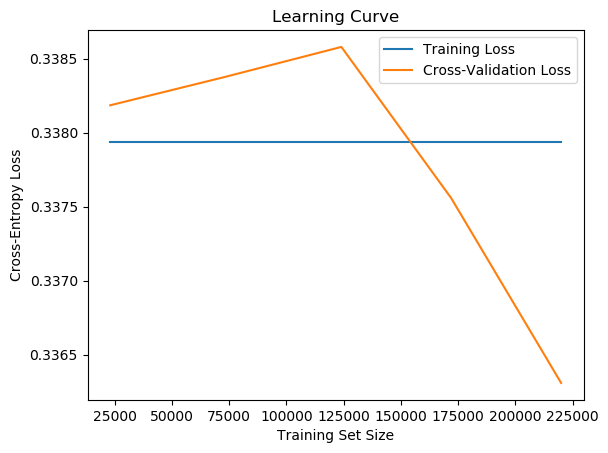

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

clf = cb.CatBoostClassifier(loss_function='Logloss',
                            iterations=50,
                            learning_rate=0.2,
                            depth=2,
                            l2_leaf_reg=3,
                            random_seed=4)

train_sizes = [23000, 73000, 124000, 172000, 220000]
# Train your model on different sizes of training sets and record the cross-entropy loss for each size
train_loss = []
cv_loss = []
    
for size in train_sizes:
    # Split the data into training and cross-validation sets
    X_train_new, X_cv, y_train_new, y_cv = train_test_split(X_train_pca_df, y_train_resampled_final, train_size=size)
    
    # Train the model on the training set
    clf .fit(X_train_pca, y_train_resampled_final)
    
    # Compute the cross-entropy loss on the training set
    y_train_pred = clf .predict_proba(X_train_pca_df)
    train_loss.append(log_loss(y_train_resampled_final, y_train_pred))
    
    # Compute the cross-entropy loss on the cross-validation set
    y_cv_pred = clf .predict_proba(X_cv)
    cv_loss.append(log_loss(y_cv, y_cv_pred))

# Plot the learning curve
plt.plot(train_sizes, train_loss, label='Training Loss')
plt.plot(train_sizes, cv_loss, label='Cross-Validation Loss')
plt.xlabel('Training Set Size')
plt.ylabel('Cross-Entropy Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

## If not overfitting/underfiting then predict on test set

## Prediction of X_test

In [24]:
y_pred = clf.predict(X_test)
y_pred

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

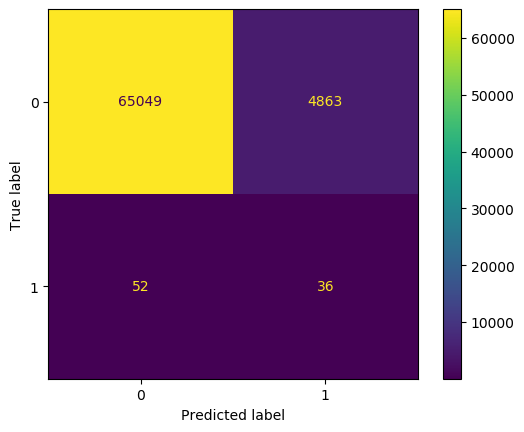

In [26]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_pca_df, y_test)

Learning rate set to 0.102809
0:	learn: 0.6036900	total: 43.6ms	remaining: 43.5s
1:	learn: 0.5448597	total: 80ms	remaining: 39.9s
2:	learn: 0.4946558	total: 122ms	remaining: 40.6s
3:	learn: 0.4570488	total: 160ms	remaining: 40s
4:	learn: 0.4307231	total: 202ms	remaining: 40.1s
5:	learn: 0.4101228	total: 237ms	remaining: 39.2s
6:	learn: 0.3958292	total: 269ms	remaining: 38.2s
7:	learn: 0.3839154	total: 303ms	remaining: 37.6s
8:	learn: 0.3749194	total: 336ms	remaining: 37s
9:	learn: 0.3673855	total: 370ms	remaining: 36.7s
10:	learn: 0.3614178	total: 411ms	remaining: 36.9s
11:	learn: 0.3569089	total: 453ms	remaining: 37.3s
12:	learn: 0.3530454	total: 489ms	remaining: 37.1s
13:	learn: 0.3496515	total: 521ms	remaining: 36.7s
14:	learn: 0.3466789	total: 555ms	remaining: 36.4s
15:	learn: 0.3441011	total: 589ms	remaining: 36.2s
16:	learn: 0.3420846	total: 624ms	remaining: 36.1s
17:	learn: 0.3399930	total: 663ms	remaining: 36.2s
18:	learn: 0.3385086	total: 696ms	remaining: 35.9s
19:	learn: 0.33

161:	learn: 0.3076164	total: 6.29s	remaining: 32.6s
162:	learn: 0.3075340	total: 6.34s	remaining: 32.5s
163:	learn: 0.3074591	total: 6.38s	remaining: 32.5s
164:	learn: 0.3073583	total: 6.42s	remaining: 32.5s
165:	learn: 0.3072051	total: 6.46s	remaining: 32.4s
166:	learn: 0.3071514	total: 6.5s	remaining: 32.4s
167:	learn: 0.3070328	total: 6.55s	remaining: 32.4s
168:	learn: 0.3068905	total: 6.59s	remaining: 32.4s
169:	learn: 0.3067229	total: 6.63s	remaining: 32.4s
170:	learn: 0.3066308	total: 6.67s	remaining: 32.3s
171:	learn: 0.3065702	total: 6.71s	remaining: 32.3s
172:	learn: 0.3065149	total: 6.75s	remaining: 32.3s
173:	learn: 0.3064706	total: 6.8s	remaining: 32.3s
174:	learn: 0.3063780	total: 6.84s	remaining: 32.2s
175:	learn: 0.3062740	total: 6.88s	remaining: 32.2s
176:	learn: 0.3062198	total: 6.93s	remaining: 32.2s
177:	learn: 0.3061243	total: 6.97s	remaining: 32.2s
178:	learn: 0.3060307	total: 7.02s	remaining: 32.2s
179:	learn: 0.3059548	total: 7.06s	remaining: 32.2s
180:	learn: 0.

320:	learn: 0.2956763	total: 12.1s	remaining: 25.6s
321:	learn: 0.2956102	total: 12.2s	remaining: 25.6s
322:	learn: 0.2955593	total: 12.2s	remaining: 25.5s
323:	learn: 0.2954729	total: 12.2s	remaining: 25.5s
324:	learn: 0.2954152	total: 12.3s	remaining: 25.5s
325:	learn: 0.2953555	total: 12.3s	remaining: 25.4s
326:	learn: 0.2952747	total: 12.3s	remaining: 25.4s
327:	learn: 0.2952202	total: 12.4s	remaining: 25.3s
328:	learn: 0.2951676	total: 12.4s	remaining: 25.3s
329:	learn: 0.2951461	total: 12.4s	remaining: 25.2s
330:	learn: 0.2951019	total: 12.5s	remaining: 25.2s
331:	learn: 0.2950584	total: 12.5s	remaining: 25.2s
332:	learn: 0.2948380	total: 12.5s	remaining: 25.1s
333:	learn: 0.2947685	total: 12.6s	remaining: 25.1s
334:	learn: 0.2947301	total: 12.6s	remaining: 25.1s
335:	learn: 0.2946920	total: 12.7s	remaining: 25s
336:	learn: 0.2946371	total: 12.7s	remaining: 25s
337:	learn: 0.2945785	total: 12.7s	remaining: 24.9s
338:	learn: 0.2944355	total: 12.8s	remaining: 24.9s
339:	learn: 0.29

489:	learn: 0.2871366	total: 16.8s	remaining: 17.5s
490:	learn: 0.2871261	total: 16.8s	remaining: 17.5s
491:	learn: 0.2870804	total: 16.9s	remaining: 17.4s
492:	learn: 0.2870501	total: 16.9s	remaining: 17.4s
493:	learn: 0.2870079	total: 16.9s	remaining: 17.3s
494:	learn: 0.2869812	total: 16.9s	remaining: 17.3s
495:	learn: 0.2869563	total: 16.9s	remaining: 17.2s
496:	learn: 0.2869197	total: 17s	remaining: 17.2s
497:	learn: 0.2868777	total: 17s	remaining: 17.1s
498:	learn: 0.2868550	total: 17s	remaining: 17.1s
499:	learn: 0.2867989	total: 17s	remaining: 17s
500:	learn: 0.2867601	total: 17s	remaining: 17s
501:	learn: 0.2867340	total: 17.1s	remaining: 16.9s
502:	learn: 0.2866967	total: 17.1s	remaining: 16.9s
503:	learn: 0.2866639	total: 17.1s	remaining: 16.8s
504:	learn: 0.2866159	total: 17.1s	remaining: 16.8s
505:	learn: 0.2865820	total: 17.1s	remaining: 16.7s
506:	learn: 0.2865356	total: 17.2s	remaining: 16.7s
507:	learn: 0.2864989	total: 17.2s	remaining: 16.6s
508:	learn: 0.2864383	tota

651:	learn: 0.2813562	total: 21.5s	remaining: 11.5s
652:	learn: 0.2813283	total: 21.6s	remaining: 11.5s
653:	learn: 0.2812968	total: 21.6s	remaining: 11.4s
654:	learn: 0.2812461	total: 21.7s	remaining: 11.4s
655:	learn: 0.2812065	total: 21.7s	remaining: 11.4s
656:	learn: 0.2811722	total: 21.8s	remaining: 11.4s
657:	learn: 0.2811394	total: 21.8s	remaining: 11.3s
658:	learn: 0.2810929	total: 21.9s	remaining: 11.3s
659:	learn: 0.2810535	total: 21.9s	remaining: 11.3s
660:	learn: 0.2810340	total: 22s	remaining: 11.3s
661:	learn: 0.2810176	total: 22s	remaining: 11.2s
662:	learn: 0.2809953	total: 22.1s	remaining: 11.2s
663:	learn: 0.2809486	total: 22.1s	remaining: 11.2s
664:	learn: 0.2809100	total: 22.2s	remaining: 11.2s
665:	learn: 0.2808856	total: 22.2s	remaining: 11.1s
666:	learn: 0.2808583	total: 22.2s	remaining: 11.1s
667:	learn: 0.2808257	total: 22.3s	remaining: 11.1s
668:	learn: 0.2807910	total: 22.3s	remaining: 11s
669:	learn: 0.2807564	total: 22.4s	remaining: 11s
670:	learn: 0.280720

813:	learn: 0.2763041	total: 28.8s	remaining: 6.58s
814:	learn: 0.2762776	total: 28.8s	remaining: 6.54s
815:	learn: 0.2762410	total: 28.9s	remaining: 6.51s
816:	learn: 0.2762161	total: 28.9s	remaining: 6.48s
817:	learn: 0.2761987	total: 29s	remaining: 6.45s
818:	learn: 0.2761821	total: 29s	remaining: 6.41s
819:	learn: 0.2761469	total: 29s	remaining: 6.38s
820:	learn: 0.2761369	total: 29.1s	remaining: 6.34s
821:	learn: 0.2761168	total: 29.1s	remaining: 6.31s
822:	learn: 0.2760841	total: 29.2s	remaining: 6.28s
823:	learn: 0.2760739	total: 29.2s	remaining: 6.24s
824:	learn: 0.2760600	total: 29.3s	remaining: 6.21s
825:	learn: 0.2760297	total: 29.3s	remaining: 6.17s
826:	learn: 0.2760071	total: 29.3s	remaining: 6.14s
827:	learn: 0.2759827	total: 29.4s	remaining: 6.1s
828:	learn: 0.2759642	total: 29.4s	remaining: 6.07s
829:	learn: 0.2759491	total: 29.5s	remaining: 6.04s
830:	learn: 0.2759344	total: 29.5s	remaining: 6s
831:	learn: 0.2759132	total: 29.6s	remaining: 5.97s
832:	learn: 0.2758900	

974:	learn: 0.2720463	total: 34.9s	remaining: 896ms
975:	learn: 0.2720192	total: 35s	remaining: 860ms
976:	learn: 0.2720032	total: 35s	remaining: 824ms
977:	learn: 0.2719754	total: 35s	remaining: 788ms
978:	learn: 0.2719433	total: 35s	remaining: 752ms
979:	learn: 0.2719210	total: 35.1s	remaining: 716ms
980:	learn: 0.2718871	total: 35.1s	remaining: 680ms
981:	learn: 0.2718593	total: 35.1s	remaining: 644ms
982:	learn: 0.2718403	total: 35.1s	remaining: 608ms
983:	learn: 0.2717989	total: 35.2s	remaining: 572ms
984:	learn: 0.2717764	total: 35.2s	remaining: 536ms
985:	learn: 0.2717463	total: 35.2s	remaining: 500ms
986:	learn: 0.2717326	total: 35.2s	remaining: 464ms
987:	learn: 0.2717053	total: 35.2s	remaining: 428ms
988:	learn: 0.2716795	total: 35.3s	remaining: 392ms
989:	learn: 0.2716563	total: 35.3s	remaining: 356ms
990:	learn: 0.2716321	total: 35.3s	remaining: 321ms
991:	learn: 0.2716140	total: 35.3s	remaining: 285ms
992:	learn: 0.2715966	total: 35.4s	remaining: 249ms
993:	learn: 0.271571

135:	learn: 0.3089204	total: 5.5s	remaining: 34.9s
136:	learn: 0.3087920	total: 5.55s	remaining: 34.9s
137:	learn: 0.3086984	total: 5.59s	remaining: 34.9s
138:	learn: 0.3086210	total: 5.63s	remaining: 34.9s
139:	learn: 0.3085582	total: 5.67s	remaining: 34.8s
140:	learn: 0.3084748	total: 5.71s	remaining: 34.8s
141:	learn: 0.3083821	total: 5.76s	remaining: 34.8s
142:	learn: 0.3082837	total: 5.8s	remaining: 34.8s
143:	learn: 0.3081520	total: 5.85s	remaining: 34.8s
144:	learn: 0.3080560	total: 5.89s	remaining: 34.7s
145:	learn: 0.3079705	total: 5.93s	remaining: 34.7s
146:	learn: 0.3079065	total: 5.96s	remaining: 34.6s
147:	learn: 0.3078508	total: 6s	remaining: 34.5s
148:	learn: 0.3077527	total: 6.04s	remaining: 34.5s
149:	learn: 0.3075899	total: 6.07s	remaining: 34.4s
150:	learn: 0.3074578	total: 6.11s	remaining: 34.3s
151:	learn: 0.3073884	total: 6.14s	remaining: 34.3s
152:	learn: 0.3073128	total: 6.18s	remaining: 34.2s
153:	learn: 0.3072347	total: 6.21s	remaining: 34.1s
154:	learn: 0.307

299:	learn: 0.2959511	total: 12.1s	remaining: 28.2s
300:	learn: 0.2958665	total: 12.1s	remaining: 28.2s
301:	learn: 0.2958221	total: 12.2s	remaining: 28.1s
302:	learn: 0.2957544	total: 12.2s	remaining: 28.1s
303:	learn: 0.2956995	total: 12.3s	remaining: 28.1s
304:	learn: 0.2956744	total: 12.3s	remaining: 28s
305:	learn: 0.2956447	total: 12.3s	remaining: 28s
306:	learn: 0.2955833	total: 12.4s	remaining: 27.9s
307:	learn: 0.2955132	total: 12.4s	remaining: 27.9s
308:	learn: 0.2954821	total: 12.4s	remaining: 27.8s
309:	learn: 0.2953922	total: 12.5s	remaining: 27.8s
310:	learn: 0.2953411	total: 12.5s	remaining: 27.7s
311:	learn: 0.2953018	total: 12.6s	remaining: 27.7s
312:	learn: 0.2952303	total: 12.6s	remaining: 27.7s
313:	learn: 0.2951807	total: 12.7s	remaining: 27.6s
314:	learn: 0.2951177	total: 12.7s	remaining: 27.6s
315:	learn: 0.2950687	total: 12.7s	remaining: 27.6s
316:	learn: 0.2950312	total: 12.8s	remaining: 27.5s
317:	learn: 0.2949780	total: 12.8s	remaining: 27.5s
318:	learn: 0.29

458:	learn: 0.2873207	total: 16.8s	remaining: 19.8s
459:	learn: 0.2872920	total: 16.8s	remaining: 19.8s
460:	learn: 0.2872396	total: 16.9s	remaining: 19.7s
461:	learn: 0.2871976	total: 16.9s	remaining: 19.7s
462:	learn: 0.2871514	total: 16.9s	remaining: 19.6s
463:	learn: 0.2871113	total: 16.9s	remaining: 19.6s
464:	learn: 0.2870751	total: 17s	remaining: 19.5s
465:	learn: 0.2870178	total: 17s	remaining: 19.5s
466:	learn: 0.2869850	total: 17s	remaining: 19.4s
467:	learn: 0.2869512	total: 17s	remaining: 19.4s
468:	learn: 0.2868991	total: 17.1s	remaining: 19.3s
469:	learn: 0.2868602	total: 17.1s	remaining: 19.3s
470:	learn: 0.2868403	total: 17.1s	remaining: 19.2s
471:	learn: 0.2868034	total: 17.2s	remaining: 19.2s
472:	learn: 0.2867768	total: 17.2s	remaining: 19.2s
473:	learn: 0.2867523	total: 17.2s	remaining: 19.1s
474:	learn: 0.2866915	total: 17.3s	remaining: 19.1s
475:	learn: 0.2866595	total: 17.3s	remaining: 19.1s
476:	learn: 0.2866172	total: 17.4s	remaining: 19s
477:	learn: 0.2865790	

618:	learn: 0.2814006	total: 23.6s	remaining: 14.5s
619:	learn: 0.2813730	total: 23.6s	remaining: 14.5s
620:	learn: 0.2813436	total: 23.7s	remaining: 14.4s
621:	learn: 0.2812838	total: 23.7s	remaining: 14.4s
622:	learn: 0.2812449	total: 23.8s	remaining: 14.4s
623:	learn: 0.2812005	total: 23.8s	remaining: 14.3s
624:	learn: 0.2811708	total: 23.9s	remaining: 14.3s
625:	learn: 0.2811499	total: 23.9s	remaining: 14.3s
626:	learn: 0.2811181	total: 23.9s	remaining: 14.2s
627:	learn: 0.2810963	total: 24s	remaining: 14.2s
628:	learn: 0.2810450	total: 24s	remaining: 14.2s
629:	learn: 0.2809989	total: 24.1s	remaining: 14.1s
630:	learn: 0.2809652	total: 24.1s	remaining: 14.1s
631:	learn: 0.2809390	total: 24.1s	remaining: 14.1s
632:	learn: 0.2809026	total: 24.2s	remaining: 14s
633:	learn: 0.2808602	total: 24.2s	remaining: 14s
634:	learn: 0.2808333	total: 24.3s	remaining: 13.9s
635:	learn: 0.2808055	total: 24.3s	remaining: 13.9s
636:	learn: 0.2807674	total: 24.3s	remaining: 13.9s
637:	learn: 0.280737

780:	learn: 0.2763500	total: 29.7s	remaining: 8.32s
781:	learn: 0.2763300	total: 29.7s	remaining: 8.28s
782:	learn: 0.2763155	total: 29.7s	remaining: 8.24s
783:	learn: 0.2762863	total: 29.7s	remaining: 8.2s
784:	learn: 0.2762530	total: 29.8s	remaining: 8.15s
785:	learn: 0.2762359	total: 29.8s	remaining: 8.11s
786:	learn: 0.2762206	total: 29.8s	remaining: 8.07s
787:	learn: 0.2761837	total: 29.8s	remaining: 8.02s
788:	learn: 0.2761628	total: 29.8s	remaining: 7.98s
789:	learn: 0.2761216	total: 29.9s	remaining: 7.94s
790:	learn: 0.2760981	total: 29.9s	remaining: 7.9s
791:	learn: 0.2760729	total: 29.9s	remaining: 7.86s
792:	learn: 0.2760432	total: 29.9s	remaining: 7.81s
793:	learn: 0.2760043	total: 29.9s	remaining: 7.77s
794:	learn: 0.2759740	total: 30s	remaining: 7.73s
795:	learn: 0.2759352	total: 30s	remaining: 7.68s
796:	learn: 0.2758974	total: 30s	remaining: 7.64s
797:	learn: 0.2758758	total: 30s	remaining: 7.6s
798:	learn: 0.2758571	total: 30.1s	remaining: 7.56s
799:	learn: 0.2758216	t

940:	learn: 0.2719673	total: 34.7s	remaining: 2.18s
941:	learn: 0.2719383	total: 34.8s	remaining: 2.14s
942:	learn: 0.2719211	total: 34.8s	remaining: 2.1s
943:	learn: 0.2718945	total: 34.8s	remaining: 2.06s
944:	learn: 0.2718682	total: 34.8s	remaining: 2.03s
945:	learn: 0.2718509	total: 34.9s	remaining: 1.99s
946:	learn: 0.2718288	total: 34.9s	remaining: 1.95s
947:	learn: 0.2717903	total: 34.9s	remaining: 1.92s
948:	learn: 0.2717733	total: 34.9s	remaining: 1.88s
949:	learn: 0.2717202	total: 35s	remaining: 1.84s
950:	learn: 0.2716861	total: 35s	remaining: 1.8s
951:	learn: 0.2716619	total: 35s	remaining: 1.76s
952:	learn: 0.2716340	total: 35s	remaining: 1.73s
953:	learn: 0.2715955	total: 35.1s	remaining: 1.69s
954:	learn: 0.2715807	total: 35.1s	remaining: 1.65s
955:	learn: 0.2715611	total: 35.1s	remaining: 1.62s
956:	learn: 0.2715436	total: 35.1s	remaining: 1.58s
957:	learn: 0.2715160	total: 35.2s	remaining: 1.54s
958:	learn: 0.2714880	total: 35.2s	remaining: 1.5s
959:	learn: 0.2714719	t

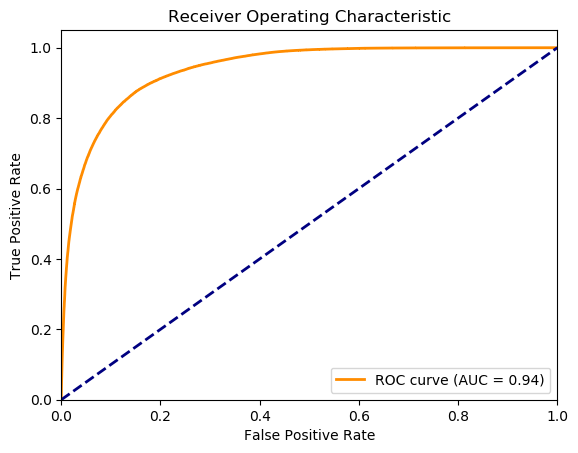

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

n_folds = 2
kf = KFold(n_splits=n_folds, shuffle=True)

clf = cb.CatBoostClassifier(loss_function='Logloss', random_seed=42)

y_proba_list = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_pca_df, y_train_resampled_final)):
    
    # Split the data into training and validation sets
    X_fold_train, y_fold_train = X_train_pca_df.iloc[train_idx].values, y_train_resampled_final[train_idx]
    X_val, y_val = X_train_pca_df.iloc[val_idx].values, y_train_resampled_final[val_idx]

    # Train and evaluate the model
    clf.fit(X_fold_train, y_fold_train)
    y_proba = clf.predict_proba(X_val)[:, 1]  # Predict the probabilities for class 1 only
    y_pred = clf.predict(X_val)
    score = clf.score(X_val, y_val)

    # Save the predicted probabilities
    y_proba_list.append(y_proba)

# Concatenate the predicted probabilities and true labels
y_proba_val = np.concatenate(y_proba_list)
y_val = np.concatenate([y_train_resampled_final[val_idx] for _, (_, val_idx) in enumerate(kf.split(X_train_pca_df, y_train_resampled_final))])

# Compute the false positive rate (fpr), true positive rate (tpr), and threshold values
fpr, tpr, thresholds = roc_curve(y_val, y_proba_val)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

scores = cross_val_score(clf, X_train_pca_df, y_train_resampled_final, cv=2, scoring=scoring)

print("Mean precision:", scores['test_precision'].mean())
print("Mean recall:", scores['test_recall'].mean())
print("Mean f1 score:", scores['test_f1'].mean())

In [51]:
# train_sizes, train_scores, test_scores = learning_curve(clf, X_train_pca, y_train_resampled_final, cv=2, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

In [52]:
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)

# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

In [53]:
# plt.subplots(1, figsize=(10,10))
# plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
# plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# plt.title("Learning Curve")
# plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
# plt.tight_layout()
# plt.show()

Learning rate set to 0.092207
0:	learn: 0.5427036	total: 17.8ms	remaining: 17.8s
1:	learn: 0.4402749	total: 35.8ms	remaining: 17.9s
2:	learn: 0.3809411	total: 54.3ms	remaining: 18s
3:	learn: 0.3367699	total: 72.8ms	remaining: 18.1s
4:	learn: 0.2951801	total: 89.8ms	remaining: 17.9s
5:	learn: 0.2707883	total: 108ms	remaining: 17.9s
6:	learn: 0.2477686	total: 125ms	remaining: 17.7s
7:	learn: 0.2323587	total: 146ms	remaining: 18.1s
8:	learn: 0.2207827	total: 166ms	remaining: 18.3s
9:	learn: 0.2121301	total: 186ms	remaining: 18.4s
10:	learn: 0.2052023	total: 208ms	remaining: 18.7s
11:	learn: 0.1991385	total: 224ms	remaining: 18.5s
12:	learn: 0.1949470	total: 241ms	remaining: 18.3s
13:	learn: 0.1911498	total: 260ms	remaining: 18.3s
14:	learn: 0.1885813	total: 278ms	remaining: 18.3s
15:	learn: 0.1863987	total: 295ms	remaining: 18.1s
16:	learn: 0.1842510	total: 310ms	remaining: 17.9s
17:	learn: 0.1823536	total: 329ms	remaining: 18s
18:	learn: 0.1811775	total: 347ms	remaining: 17.9s
19:	learn:

164:	learn: 0.1630121	total: 3.32s	remaining: 16.8s
165:	learn: 0.1629856	total: 3.36s	remaining: 16.9s
166:	learn: 0.1629473	total: 3.39s	remaining: 16.9s
167:	learn: 0.1629074	total: 3.42s	remaining: 16.9s
168:	learn: 0.1628789	total: 3.45s	remaining: 17s
169:	learn: 0.1628538	total: 3.48s	remaining: 17s
170:	learn: 0.1628063	total: 3.51s	remaining: 17s
171:	learn: 0.1627596	total: 3.55s	remaining: 17.1s
172:	learn: 0.1627165	total: 3.58s	remaining: 17.1s
173:	learn: 0.1626684	total: 3.61s	remaining: 17.2s
174:	learn: 0.1626063	total: 3.65s	remaining: 17.2s
175:	learn: 0.1625582	total: 3.68s	remaining: 17.2s
176:	learn: 0.1625195	total: 3.71s	remaining: 17.3s
177:	learn: 0.1624763	total: 3.74s	remaining: 17.3s
178:	learn: 0.1624397	total: 3.78s	remaining: 17.3s
179:	learn: 0.1623934	total: 3.81s	remaining: 17.3s
180:	learn: 0.1623626	total: 3.84s	remaining: 17.4s
181:	learn: 0.1623169	total: 3.88s	remaining: 17.4s
182:	learn: 0.1622658	total: 3.91s	remaining: 17.5s
183:	learn: 0.1622

327:	learn: 0.1576530	total: 9.48s	remaining: 19.4s
328:	learn: 0.1576268	total: 9.51s	remaining: 19.4s
329:	learn: 0.1576131	total: 9.55s	remaining: 19.4s
330:	learn: 0.1575784	total: 9.59s	remaining: 19.4s
331:	learn: 0.1575465	total: 9.62s	remaining: 19.4s
332:	learn: 0.1575230	total: 9.66s	remaining: 19.4s
333:	learn: 0.1574991	total: 9.7s	remaining: 19.3s
334:	learn: 0.1574762	total: 9.74s	remaining: 19.3s
335:	learn: 0.1574086	total: 9.77s	remaining: 19.3s
336:	learn: 0.1573917	total: 9.81s	remaining: 19.3s
337:	learn: 0.1573710	total: 9.85s	remaining: 19.3s
338:	learn: 0.1573518	total: 9.88s	remaining: 19.3s
339:	learn: 0.1573188	total: 9.92s	remaining: 19.3s
340:	learn: 0.1572951	total: 9.95s	remaining: 19.2s
341:	learn: 0.1572483	total: 9.99s	remaining: 19.2s
342:	learn: 0.1572132	total: 10s	remaining: 19.2s
343:	learn: 0.1571829	total: 10.1s	remaining: 19.2s
344:	learn: 0.1571514	total: 10.1s	remaining: 19.2s
345:	learn: 0.1571165	total: 10.1s	remaining: 19.2s
346:	learn: 0.1

497:	learn: 0.1536158	total: 14.9s	remaining: 15s
498:	learn: 0.1536010	total: 14.9s	remaining: 14.9s
499:	learn: 0.1535911	total: 14.9s	remaining: 14.9s
500:	learn: 0.1535542	total: 14.9s	remaining: 14.9s
501:	learn: 0.1534999	total: 14.9s	remaining: 14.8s
502:	learn: 0.1534826	total: 14.9s	remaining: 14.8s
503:	learn: 0.1534630	total: 15s	remaining: 14.7s
504:	learn: 0.1534175	total: 15s	remaining: 14.7s
505:	learn: 0.1533901	total: 15s	remaining: 14.6s
506:	learn: 0.1533701	total: 15s	remaining: 14.6s
507:	learn: 0.1533414	total: 15s	remaining: 14.5s
508:	learn: 0.1533170	total: 15s	remaining: 14.5s
509:	learn: 0.1532895	total: 15.1s	remaining: 14.5s
510:	learn: 0.1532634	total: 15.1s	remaining: 14.4s
511:	learn: 0.1532133	total: 15.1s	remaining: 14.4s
512:	learn: 0.1531989	total: 15.1s	remaining: 14.3s
513:	learn: 0.1531838	total: 15.1s	remaining: 14.3s
514:	learn: 0.1531686	total: 15.1s	remaining: 14.3s
515:	learn: 0.1531412	total: 15.1s	remaining: 14.2s
516:	learn: 0.1531227	tota

661:	learn: 0.1504204	total: 18.6s	remaining: 9.49s
662:	learn: 0.1504073	total: 18.6s	remaining: 9.46s
663:	learn: 0.1503851	total: 18.6s	remaining: 9.43s
664:	learn: 0.1503662	total: 18.7s	remaining: 9.4s
665:	learn: 0.1503431	total: 18.7s	remaining: 9.36s
666:	learn: 0.1503212	total: 18.7s	remaining: 9.33s
667:	learn: 0.1503048	total: 18.7s	remaining: 9.3s
668:	learn: 0.1502931	total: 18.7s	remaining: 9.26s
669:	learn: 0.1502772	total: 18.7s	remaining: 9.23s
670:	learn: 0.1502666	total: 18.8s	remaining: 9.2s
671:	learn: 0.1502470	total: 18.8s	remaining: 9.16s
672:	learn: 0.1502270	total: 18.8s	remaining: 9.13s
673:	learn: 0.1502005	total: 18.8s	remaining: 9.1s
674:	learn: 0.1501783	total: 18.8s	remaining: 9.07s
675:	learn: 0.1501138	total: 18.8s	remaining: 9.03s
676:	learn: 0.1500970	total: 18.9s	remaining: 9s
677:	learn: 0.1500711	total: 18.9s	remaining: 8.97s
678:	learn: 0.1500525	total: 18.9s	remaining: 8.94s
679:	learn: 0.1500287	total: 18.9s	remaining: 8.9s
680:	learn: 0.150018

822:	learn: 0.1476449	total: 22.4s	remaining: 4.81s
823:	learn: 0.1476128	total: 22.4s	remaining: 4.79s
824:	learn: 0.1475978	total: 22.4s	remaining: 4.76s
825:	learn: 0.1475860	total: 22.5s	remaining: 4.74s
826:	learn: 0.1475757	total: 22.5s	remaining: 4.71s
827:	learn: 0.1475540	total: 22.5s	remaining: 4.68s
828:	learn: 0.1475397	total: 22.6s	remaining: 4.66s
829:	learn: 0.1475305	total: 22.6s	remaining: 4.63s
830:	learn: 0.1475116	total: 22.7s	remaining: 4.61s
831:	learn: 0.1475018	total: 22.7s	remaining: 4.58s
832:	learn: 0.1474809	total: 22.7s	remaining: 4.55s
833:	learn: 0.1474372	total: 22.8s	remaining: 4.53s
834:	learn: 0.1474237	total: 22.8s	remaining: 4.5s
835:	learn: 0.1474087	total: 22.8s	remaining: 4.48s
836:	learn: 0.1473854	total: 22.9s	remaining: 4.45s
837:	learn: 0.1473711	total: 22.9s	remaining: 4.42s
838:	learn: 0.1473596	total: 22.9s	remaining: 4.4s
839:	learn: 0.1473481	total: 23s	remaining: 4.37s
840:	learn: 0.1473282	total: 23s	remaining: 4.35s
841:	learn: 0.1473

982:	learn: 0.1451741	total: 27s	remaining: 466ms
983:	learn: 0.1451622	total: 27s	remaining: 439ms
984:	learn: 0.1451468	total: 27s	remaining: 411ms
985:	learn: 0.1451381	total: 27s	remaining: 384ms
986:	learn: 0.1451212	total: 27s	remaining: 356ms
987:	learn: 0.1451076	total: 27.1s	remaining: 329ms
988:	learn: 0.1450886	total: 27.1s	remaining: 301ms
989:	learn: 0.1450738	total: 27.1s	remaining: 274ms
990:	learn: 0.1450570	total: 27.1s	remaining: 246ms
991:	learn: 0.1450448	total: 27.1s	remaining: 219ms
992:	learn: 0.1450270	total: 27.2s	remaining: 192ms
993:	learn: 0.1450156	total: 27.2s	remaining: 164ms
994:	learn: 0.1450089	total: 27.2s	remaining: 137ms
995:	learn: 0.1449902	total: 27.2s	remaining: 109ms
996:	learn: 0.1449806	total: 27.3s	remaining: 82ms
997:	learn: 0.1449629	total: 27.3s	remaining: 54.7ms
998:	learn: 0.1449538	total: 27.3s	remaining: 27.3ms
999:	learn: 0.1449445	total: 27.3s	remaining: 0us
Learning rate set to 0.102809
0:	learn: 0.6028286	total: 24.4ms	remaining: 

144:	learn: 0.3091124	total: 4.52s	remaining: 26.7s
145:	learn: 0.3090313	total: 4.55s	remaining: 26.6s
146:	learn: 0.3089285	total: 4.57s	remaining: 26.5s
147:	learn: 0.3088126	total: 4.59s	remaining: 26.4s
148:	learn: 0.3087040	total: 4.61s	remaining: 26.3s
149:	learn: 0.3086178	total: 4.63s	remaining: 26.2s
150:	learn: 0.3085554	total: 4.65s	remaining: 26.2s
151:	learn: 0.3085069	total: 4.67s	remaining: 26.1s
152:	learn: 0.3083860	total: 4.69s	remaining: 26s
153:	learn: 0.3083223	total: 4.71s	remaining: 25.9s
154:	learn: 0.3082623	total: 4.74s	remaining: 25.8s
155:	learn: 0.3081742	total: 4.78s	remaining: 25.9s
156:	learn: 0.3080760	total: 4.82s	remaining: 25.9s
157:	learn: 0.3079945	total: 4.86s	remaining: 25.9s
158:	learn: 0.3079213	total: 4.88s	remaining: 25.8s
159:	learn: 0.3078470	total: 4.91s	remaining: 25.8s
160:	learn: 0.3077105	total: 4.94s	remaining: 25.7s
161:	learn: 0.3076387	total: 4.97s	remaining: 25.7s
162:	learn: 0.3075499	total: 5.01s	remaining: 25.7s
163:	learn: 0.

305:	learn: 0.2966164	total: 9.58s	remaining: 21.7s
306:	learn: 0.2965750	total: 9.63s	remaining: 21.7s
307:	learn: 0.2965182	total: 9.67s	remaining: 21.7s
308:	learn: 0.2964568	total: 9.71s	remaining: 21.7s
309:	learn: 0.2964019	total: 9.75s	remaining: 21.7s
310:	learn: 0.2963395	total: 9.79s	remaining: 21.7s
311:	learn: 0.2962982	total: 9.84s	remaining: 21.7s
312:	learn: 0.2962329	total: 9.88s	remaining: 21.7s
313:	learn: 0.2961629	total: 9.93s	remaining: 21.7s
314:	learn: 0.2960479	total: 9.98s	remaining: 21.7s
315:	learn: 0.2959753	total: 10s	remaining: 21.7s
316:	learn: 0.2959257	total: 10.1s	remaining: 21.7s
317:	learn: 0.2958790	total: 10.1s	remaining: 21.7s
318:	learn: 0.2957960	total: 10.2s	remaining: 21.7s
319:	learn: 0.2957562	total: 10.2s	remaining: 21.7s
320:	learn: 0.2957085	total: 10.2s	remaining: 21.7s
321:	learn: 0.2956614	total: 10.3s	remaining: 21.7s
322:	learn: 0.2956113	total: 10.3s	remaining: 21.7s
323:	learn: 0.2955471	total: 10.4s	remaining: 21.7s
324:	learn: 0.

466:	learn: 0.2877885	total: 16.1s	remaining: 18.4s
467:	learn: 0.2877509	total: 16.2s	remaining: 18.4s
468:	learn: 0.2877196	total: 16.2s	remaining: 18.4s
469:	learn: 0.2876542	total: 16.3s	remaining: 18.4s
470:	learn: 0.2876019	total: 16.3s	remaining: 18.4s
471:	learn: 0.2875803	total: 16.4s	remaining: 18.3s
472:	learn: 0.2875411	total: 16.4s	remaining: 18.3s
473:	learn: 0.2874806	total: 16.5s	remaining: 18.3s
474:	learn: 0.2874248	total: 16.5s	remaining: 18.3s
475:	learn: 0.2874022	total: 16.6s	remaining: 18.2s
476:	learn: 0.2873662	total: 16.6s	remaining: 18.2s
477:	learn: 0.2873291	total: 16.7s	remaining: 18.2s
478:	learn: 0.2872626	total: 16.7s	remaining: 18.1s
479:	learn: 0.2872323	total: 16.7s	remaining: 18.1s
480:	learn: 0.2871804	total: 16.7s	remaining: 18.1s
481:	learn: 0.2871360	total: 16.8s	remaining: 18s
482:	learn: 0.2870862	total: 16.8s	remaining: 18s
483:	learn: 0.2870262	total: 16.8s	remaining: 17.9s
484:	learn: 0.2869779	total: 16.9s	remaining: 17.9s
485:	learn: 0.28

628:	learn: 0.2819568	total: 24.4s	remaining: 14.4s
629:	learn: 0.2819303	total: 24.4s	remaining: 14.3s
630:	learn: 0.2818927	total: 24.5s	remaining: 14.3s
631:	learn: 0.2818499	total: 24.5s	remaining: 14.3s
632:	learn: 0.2818359	total: 24.6s	remaining: 14.2s
633:	learn: 0.2817963	total: 24.6s	remaining: 14.2s
634:	learn: 0.2817445	total: 24.7s	remaining: 14.2s
635:	learn: 0.2816979	total: 24.7s	remaining: 14.1s
636:	learn: 0.2816712	total: 24.8s	remaining: 14.1s
637:	learn: 0.2816527	total: 24.8s	remaining: 14.1s
638:	learn: 0.2816314	total: 24.9s	remaining: 14.1s
639:	learn: 0.2816020	total: 24.9s	remaining: 14s
640:	learn: 0.2815696	total: 25s	remaining: 14s
641:	learn: 0.2815073	total: 25s	remaining: 14s
642:	learn: 0.2814809	total: 25.1s	remaining: 13.9s
643:	learn: 0.2814537	total: 25.2s	remaining: 13.9s
644:	learn: 0.2814204	total: 25.2s	remaining: 13.9s
645:	learn: 0.2813878	total: 25.3s	remaining: 13.8s
646:	learn: 0.2813474	total: 25.3s	remaining: 13.8s
647:	learn: 0.2813304	

787:	learn: 0.2770444	total: 30.9s	remaining: 8.31s
788:	learn: 0.2770156	total: 30.9s	remaining: 8.27s
789:	learn: 0.2769989	total: 31s	remaining: 8.23s
790:	learn: 0.2769729	total: 31s	remaining: 8.19s
791:	learn: 0.2769570	total: 31s	remaining: 8.15s
792:	learn: 0.2769383	total: 31.1s	remaining: 8.11s
793:	learn: 0.2769193	total: 31.1s	remaining: 8.07s
794:	learn: 0.2768974	total: 31.2s	remaining: 8.04s
795:	learn: 0.2768577	total: 31.2s	remaining: 8s
796:	learn: 0.2768335	total: 31.2s	remaining: 7.96s
797:	learn: 0.2768047	total: 31.3s	remaining: 7.92s
798:	learn: 0.2767889	total: 31.3s	remaining: 7.88s
799:	learn: 0.2767511	total: 31.4s	remaining: 7.84s
800:	learn: 0.2767307	total: 31.4s	remaining: 7.8s
801:	learn: 0.2767150	total: 31.5s	remaining: 7.77s
802:	learn: 0.2766972	total: 31.5s	remaining: 7.73s
803:	learn: 0.2766481	total: 31.6s	remaining: 7.69s
804:	learn: 0.2766316	total: 31.6s	remaining: 7.66s
805:	learn: 0.2766034	total: 31.6s	remaining: 7.62s
806:	learn: 0.2765541	

952:	learn: 0.2727934	total: 36.5s	remaining: 1.8s
953:	learn: 0.2727527	total: 36.6s	remaining: 1.76s
954:	learn: 0.2727281	total: 36.6s	remaining: 1.73s
955:	learn: 0.2727095	total: 36.7s	remaining: 1.69s
956:	learn: 0.2726934	total: 36.7s	remaining: 1.65s
957:	learn: 0.2726717	total: 36.8s	remaining: 1.61s
958:	learn: 0.2726369	total: 36.8s	remaining: 1.57s
959:	learn: 0.2725903	total: 36.9s	remaining: 1.54s
960:	learn: 0.2725575	total: 37s	remaining: 1.5s
961:	learn: 0.2725203	total: 37s	remaining: 1.46s
962:	learn: 0.2724987	total: 37.1s	remaining: 1.42s
963:	learn: 0.2724799	total: 37.1s	remaining: 1.39s
964:	learn: 0.2724608	total: 37.2s	remaining: 1.35s
965:	learn: 0.2724185	total: 37.3s	remaining: 1.31s
966:	learn: 0.2723825	total: 37.4s	remaining: 1.27s
967:	learn: 0.2723486	total: 37.4s	remaining: 1.24s
968:	learn: 0.2723134	total: 37.6s	remaining: 1.2s
969:	learn: 0.2722912	total: 37.6s	remaining: 1.16s
970:	learn: 0.2722601	total: 37.7s	remaining: 1.13s
971:	learn: 0.27224

113:	learn: 0.1616098	total: 5.08s	remaining: 39.5s
114:	learn: 0.1615815	total: 5.13s	remaining: 39.5s
115:	learn: 0.1615254	total: 5.17s	remaining: 39.4s
116:	learn: 0.1614524	total: 5.22s	remaining: 39.4s
117:	learn: 0.1613912	total: 5.27s	remaining: 39.4s
118:	learn: 0.1613398	total: 5.32s	remaining: 39.4s
119:	learn: 0.1612863	total: 5.37s	remaining: 39.4s
120:	learn: 0.1612340	total: 5.42s	remaining: 39.4s
121:	learn: 0.1611895	total: 5.47s	remaining: 39.4s
122:	learn: 0.1611365	total: 5.52s	remaining: 39.4s
123:	learn: 0.1610894	total: 5.57s	remaining: 39.4s
124:	learn: 0.1610578	total: 5.62s	remaining: 39.3s
125:	learn: 0.1610224	total: 5.66s	remaining: 39.3s
126:	learn: 0.1609559	total: 5.71s	remaining: 39.2s
127:	learn: 0.1609086	total: 5.75s	remaining: 39.2s
128:	learn: 0.1608688	total: 5.8s	remaining: 39.2s
129:	learn: 0.1608094	total: 5.85s	remaining: 39.1s
130:	learn: 0.1607612	total: 5.9s	remaining: 39.1s
131:	learn: 0.1607310	total: 5.97s	remaining: 39.2s
132:	learn: 0.

272:	learn: 0.1554572	total: 12.6s	remaining: 33.6s
273:	learn: 0.1554180	total: 12.7s	remaining: 33.6s
274:	learn: 0.1553935	total: 12.7s	remaining: 33.6s
275:	learn: 0.1553539	total: 12.8s	remaining: 33.5s
276:	learn: 0.1553227	total: 12.8s	remaining: 33.5s
277:	learn: 0.1553041	total: 12.9s	remaining: 33.4s
278:	learn: 0.1552728	total: 12.9s	remaining: 33.4s
279:	learn: 0.1552463	total: 13s	remaining: 33.4s
280:	learn: 0.1552209	total: 13s	remaining: 33.3s
281:	learn: 0.1551913	total: 13.1s	remaining: 33.2s
282:	learn: 0.1551695	total: 13.1s	remaining: 33.2s
283:	learn: 0.1551522	total: 13.1s	remaining: 33.1s
284:	learn: 0.1551216	total: 13.2s	remaining: 33.1s
285:	learn: 0.1550844	total: 13.2s	remaining: 33s
286:	learn: 0.1550606	total: 13.3s	remaining: 33s
287:	learn: 0.1550317	total: 13.3s	remaining: 32.9s
288:	learn: 0.1550060	total: 13.4s	remaining: 32.9s
289:	learn: 0.1549657	total: 13.4s	remaining: 32.8s
290:	learn: 0.1549336	total: 13.5s	remaining: 32.8s
291:	learn: 0.154901

435:	learn: 0.1511623	total: 18.5s	remaining: 23.9s
436:	learn: 0.1511419	total: 18.5s	remaining: 23.8s
437:	learn: 0.1511238	total: 18.6s	remaining: 23.8s
438:	learn: 0.1511116	total: 18.6s	remaining: 23.8s
439:	learn: 0.1510948	total: 18.6s	remaining: 23.7s
440:	learn: 0.1510763	total: 18.7s	remaining: 23.7s
441:	learn: 0.1510545	total: 18.7s	remaining: 23.6s
442:	learn: 0.1510229	total: 18.7s	remaining: 23.5s
443:	learn: 0.1510023	total: 18.7s	remaining: 23.5s
444:	learn: 0.1509876	total: 18.8s	remaining: 23.4s
445:	learn: 0.1509611	total: 18.8s	remaining: 23.3s
446:	learn: 0.1509380	total: 18.8s	remaining: 23.3s
447:	learn: 0.1509170	total: 18.8s	remaining: 23.2s
448:	learn: 0.1508931	total: 18.9s	remaining: 23.1s
449:	learn: 0.1508598	total: 18.9s	remaining: 23.1s
450:	learn: 0.1508446	total: 18.9s	remaining: 23s
451:	learn: 0.1508193	total: 18.9s	remaining: 22.9s
452:	learn: 0.1508023	total: 18.9s	remaining: 22.9s
453:	learn: 0.1507856	total: 19s	remaining: 22.8s
454:	learn: 0.15

597:	learn: 0.1477693	total: 22.6s	remaining: 15.2s
598:	learn: 0.1477275	total: 22.6s	remaining: 15.1s
599:	learn: 0.1477122	total: 22.6s	remaining: 15.1s
600:	learn: 0.1476973	total: 22.6s	remaining: 15s
601:	learn: 0.1476850	total: 22.7s	remaining: 15s
602:	learn: 0.1476657	total: 22.7s	remaining: 14.9s
603:	learn: 0.1476412	total: 22.7s	remaining: 14.9s
604:	learn: 0.1476200	total: 22.7s	remaining: 14.8s
605:	learn: 0.1476060	total: 22.7s	remaining: 14.8s
606:	learn: 0.1475916	total: 22.8s	remaining: 14.7s
607:	learn: 0.1475754	total: 22.8s	remaining: 14.7s
608:	learn: 0.1475647	total: 22.8s	remaining: 14.6s
609:	learn: 0.1475321	total: 22.8s	remaining: 14.6s
610:	learn: 0.1475187	total: 22.8s	remaining: 14.5s
611:	learn: 0.1475048	total: 22.8s	remaining: 14.5s
612:	learn: 0.1474963	total: 22.9s	remaining: 14.4s
613:	learn: 0.1474748	total: 22.9s	remaining: 14.4s
614:	learn: 0.1474470	total: 22.9s	remaining: 14.3s
615:	learn: 0.1474047	total: 22.9s	remaining: 14.3s
616:	learn: 0.14

763:	learn: 0.1447365	total: 26.3s	remaining: 8.11s
764:	learn: 0.1447256	total: 26.3s	remaining: 8.08s
765:	learn: 0.1447030	total: 26.3s	remaining: 8.04s
766:	learn: 0.1446409	total: 26.4s	remaining: 8.01s
767:	learn: 0.1446227	total: 26.4s	remaining: 7.98s
768:	learn: 0.1446004	total: 26.4s	remaining: 7.94s
769:	learn: 0.1445760	total: 26.5s	remaining: 7.91s
770:	learn: 0.1445564	total: 26.5s	remaining: 7.87s
771:	learn: 0.1445413	total: 26.5s	remaining: 7.84s
772:	learn: 0.1445256	total: 26.6s	remaining: 7.8s
773:	learn: 0.1445061	total: 26.6s	remaining: 7.77s
774:	learn: 0.1444942	total: 26.6s	remaining: 7.73s
775:	learn: 0.1444819	total: 26.7s	remaining: 7.7s
776:	learn: 0.1444699	total: 26.7s	remaining: 7.66s
777:	learn: 0.1444622	total: 26.7s	remaining: 7.63s
778:	learn: 0.1444524	total: 26.8s	remaining: 7.59s
779:	learn: 0.1444339	total: 26.8s	remaining: 7.56s
780:	learn: 0.1444215	total: 26.8s	remaining: 7.52s
781:	learn: 0.1444109	total: 26.9s	remaining: 7.49s
782:	learn: 0.

927:	learn: 0.1421646	total: 30.5s	remaining: 2.37s
928:	learn: 0.1421510	total: 30.6s	remaining: 2.34s
929:	learn: 0.1421392	total: 30.6s	remaining: 2.3s
930:	learn: 0.1421256	total: 30.6s	remaining: 2.27s
931:	learn: 0.1421138	total: 30.7s	remaining: 2.24s
932:	learn: 0.1420982	total: 30.7s	remaining: 2.2s
933:	learn: 0.1420866	total: 30.7s	remaining: 2.17s
934:	learn: 0.1420704	total: 30.7s	remaining: 2.13s
935:	learn: 0.1420570	total: 30.7s	remaining: 2.1s
936:	learn: 0.1420431	total: 30.7s	remaining: 2.07s
937:	learn: 0.1420305	total: 30.8s	remaining: 2.03s
938:	learn: 0.1420122	total: 30.8s	remaining: 2s
939:	learn: 0.1420052	total: 30.8s	remaining: 1.96s
940:	learn: 0.1419846	total: 30.8s	remaining: 1.93s
941:	learn: 0.1419735	total: 30.8s	remaining: 1.9s
942:	learn: 0.1419482	total: 30.8s	remaining: 1.86s
943:	learn: 0.1419222	total: 30.8s	remaining: 1.83s
944:	learn: 0.1419085	total: 30.9s	remaining: 1.8s
945:	learn: 0.1418858	total: 30.9s	remaining: 1.76s
946:	learn: 0.141873

91:	learn: 0.3129868	total: 3.63s	remaining: 35.8s
92:	learn: 0.3128357	total: 3.68s	remaining: 35.9s
93:	learn: 0.3126980	total: 3.72s	remaining: 35.9s
94:	learn: 0.3125805	total: 3.76s	remaining: 35.9s
95:	learn: 0.3124912	total: 3.81s	remaining: 35.9s
96:	learn: 0.3123302	total: 3.85s	remaining: 35.8s
97:	learn: 0.3122373	total: 3.89s	remaining: 35.8s
98:	learn: 0.3120729	total: 3.92s	remaining: 35.7s
99:	learn: 0.3119244	total: 3.96s	remaining: 35.7s
100:	learn: 0.3117454	total: 4s	remaining: 35.6s
101:	learn: 0.3116302	total: 4.04s	remaining: 35.6s
102:	learn: 0.3115221	total: 4.08s	remaining: 35.5s
103:	learn: 0.3113700	total: 4.12s	remaining: 35.5s
104:	learn: 0.3112930	total: 4.15s	remaining: 35.4s
105:	learn: 0.3111600	total: 4.19s	remaining: 35.3s
106:	learn: 0.3109593	total: 4.22s	remaining: 35.3s
107:	learn: 0.3108330	total: 4.26s	remaining: 35.2s
108:	learn: 0.3107321	total: 4.3s	remaining: 35.2s
109:	learn: 0.3106554	total: 4.34s	remaining: 35.1s
110:	learn: 0.3105518	tot

251:	learn: 0.2982955	total: 9.31s	remaining: 27.6s
252:	learn: 0.2982309	total: 9.33s	remaining: 27.6s
253:	learn: 0.2981204	total: 9.36s	remaining: 27.5s
254:	learn: 0.2980566	total: 9.38s	remaining: 27.4s
255:	learn: 0.2980176	total: 9.41s	remaining: 27.3s
256:	learn: 0.2978973	total: 9.44s	remaining: 27.3s
257:	learn: 0.2978510	total: 9.47s	remaining: 27.2s
258:	learn: 0.2978128	total: 9.5s	remaining: 27.2s
259:	learn: 0.2977017	total: 9.52s	remaining: 27.1s
260:	learn: 0.2976612	total: 9.55s	remaining: 27s
261:	learn: 0.2975829	total: 9.58s	remaining: 27s
262:	learn: 0.2974885	total: 9.61s	remaining: 26.9s
263:	learn: 0.2974184	total: 9.64s	remaining: 26.9s
264:	learn: 0.2973639	total: 9.66s	remaining: 26.8s
265:	learn: 0.2973155	total: 9.69s	remaining: 26.7s
266:	learn: 0.2972113	total: 9.71s	remaining: 26.7s
267:	learn: 0.2971638	total: 9.74s	remaining: 26.6s
268:	learn: 0.2971098	total: 9.76s	remaining: 26.5s
269:	learn: 0.2970628	total: 9.79s	remaining: 26.5s
270:	learn: 0.296

410:	learn: 0.2889811	total: 13.6s	remaining: 19.5s
411:	learn: 0.2889475	total: 13.7s	remaining: 19.5s
412:	learn: 0.2888868	total: 13.7s	remaining: 19.5s
413:	learn: 0.2888534	total: 13.8s	remaining: 19.5s
414:	learn: 0.2887961	total: 13.8s	remaining: 19.4s
415:	learn: 0.2887662	total: 13.8s	remaining: 19.4s
416:	learn: 0.2886950	total: 13.9s	remaining: 19.4s
417:	learn: 0.2886534	total: 13.9s	remaining: 19.4s
418:	learn: 0.2885951	total: 13.9s	remaining: 19.3s
419:	learn: 0.2885565	total: 14s	remaining: 19.3s
420:	learn: 0.2885004	total: 14s	remaining: 19.3s
421:	learn: 0.2883927	total: 14.1s	remaining: 19.3s
422:	learn: 0.2883434	total: 14.1s	remaining: 19.2s
423:	learn: 0.2883128	total: 14.2s	remaining: 19.2s
424:	learn: 0.2882705	total: 14.2s	remaining: 19.2s
425:	learn: 0.2882072	total: 14.2s	remaining: 19.2s
426:	learn: 0.2881702	total: 14.3s	remaining: 19.2s
427:	learn: 0.2881157	total: 14.3s	remaining: 19.1s
428:	learn: 0.2880704	total: 14.4s	remaining: 19.1s
429:	learn: 0.28

569:	learn: 0.2825022	total: 18.5s	remaining: 13.9s
570:	learn: 0.2824653	total: 18.5s	remaining: 13.9s
571:	learn: 0.2824270	total: 18.5s	remaining: 13.8s
572:	learn: 0.2823562	total: 18.5s	remaining: 13.8s
573:	learn: 0.2823202	total: 18.5s	remaining: 13.8s
574:	learn: 0.2822860	total: 18.6s	remaining: 13.7s
575:	learn: 0.2822579	total: 18.6s	remaining: 13.7s
576:	learn: 0.2822348	total: 18.6s	remaining: 13.6s
577:	learn: 0.2822117	total: 18.6s	remaining: 13.6s
578:	learn: 0.2821743	total: 18.6s	remaining: 13.6s
579:	learn: 0.2821407	total: 18.7s	remaining: 13.5s
580:	learn: 0.2820876	total: 18.7s	remaining: 13.5s
581:	learn: 0.2820456	total: 18.7s	remaining: 13.4s
582:	learn: 0.2820075	total: 18.7s	remaining: 13.4s
583:	learn: 0.2819713	total: 18.7s	remaining: 13.3s
584:	learn: 0.2819474	total: 18.8s	remaining: 13.3s
585:	learn: 0.2819136	total: 18.8s	remaining: 13.3s
586:	learn: 0.2818826	total: 18.8s	remaining: 13.2s
587:	learn: 0.2818545	total: 18.8s	remaining: 13.2s
588:	learn: 

731:	learn: 0.2773067	total: 22.6s	remaining: 8.26s
732:	learn: 0.2772740	total: 22.6s	remaining: 8.23s
733:	learn: 0.2772404	total: 22.6s	remaining: 8.2s
734:	learn: 0.2772034	total: 22.7s	remaining: 8.17s
735:	learn: 0.2771868	total: 22.7s	remaining: 8.14s
736:	learn: 0.2771636	total: 22.7s	remaining: 8.11s
737:	learn: 0.2771327	total: 22.8s	remaining: 8.08s
738:	learn: 0.2771081	total: 22.8s	remaining: 8.05s
739:	learn: 0.2770939	total: 22.8s	remaining: 8.02s
740:	learn: 0.2770552	total: 22.9s	remaining: 7.99s
741:	learn: 0.2769917	total: 22.9s	remaining: 7.96s
742:	learn: 0.2769602	total: 22.9s	remaining: 7.93s
743:	learn: 0.2769334	total: 23s	remaining: 7.9s
744:	learn: 0.2768923	total: 23s	remaining: 7.88s
745:	learn: 0.2768784	total: 23s	remaining: 7.84s
746:	learn: 0.2768613	total: 23.1s	remaining: 7.82s
747:	learn: 0.2768430	total: 23.1s	remaining: 7.79s
748:	learn: 0.2768254	total: 23.1s	remaining: 7.76s
749:	learn: 0.2768003	total: 23.2s	remaining: 7.73s
750:	learn: 0.276780

892:	learn: 0.2725903	total: 30.2s	remaining: 3.61s
893:	learn: 0.2725397	total: 30.2s	remaining: 3.58s
894:	learn: 0.2725226	total: 30.3s	remaining: 3.55s
895:	learn: 0.2725044	total: 30.3s	remaining: 3.52s
896:	learn: 0.2724571	total: 30.4s	remaining: 3.49s
897:	learn: 0.2724330	total: 30.4s	remaining: 3.46s
898:	learn: 0.2723943	total: 30.5s	remaining: 3.43s
899:	learn: 0.2723699	total: 30.6s	remaining: 3.4s
900:	learn: 0.2723278	total: 30.6s	remaining: 3.36s
901:	learn: 0.2722961	total: 30.7s	remaining: 3.33s
902:	learn: 0.2722565	total: 30.7s	remaining: 3.3s
903:	learn: 0.2722317	total: 30.8s	remaining: 3.27s
904:	learn: 0.2722151	total: 30.8s	remaining: 3.24s
905:	learn: 0.2722001	total: 30.9s	remaining: 3.21s
906:	learn: 0.2721801	total: 30.9s	remaining: 3.17s
907:	learn: 0.2721556	total: 31s	remaining: 3.14s
908:	learn: 0.2721398	total: 31s	remaining: 3.11s
909:	learn: 0.2721098	total: 31.1s	remaining: 3.07s
910:	learn: 0.2720760	total: 31.1s	remaining: 3.04s
911:	learn: 0.2720

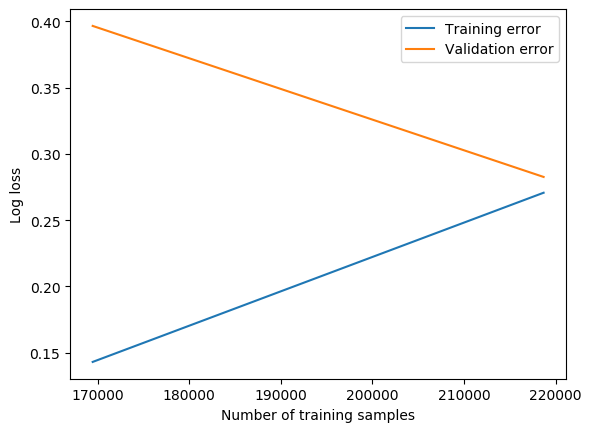

In [34]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train_pca, y_train_resampled_final,
    cv=KFold(n_splits=2, shuffle=True),
    scoring='neg_log_loss',
    train_sizes=np.linspace(0.1, 1.0, 5),
    random_state=42
)

fig, ax = plt.subplots()
ax.plot(train_sizes, -train_scores.mean(axis=1), label='Training error')
ax.plot(train_sizes, -test_scores.mean(axis=1), label='Validation error')
ax.set_xlabel('Number of training samples')
ax.set_ylabel('Log loss')
#ax.set_title(f'Learning curve for {estimator.__class__.__name__}')
ax.legend()

## Make prediction on test set

In [42]:
from sklearn.metrics import f1_score, recall_score, precision_score

y_pred = clf.predict(X_test_pca_df)

# Compute the precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the scores
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Precision: 0.008
Recall: 0.432
F1 score: 0.016


In [43]:
import numpy as np

# Assuming y_train is a numpy array
unique, counts = np.unique(y_test, return_counts=True)
print("Counts of each class in y_train:", dict(zip(unique, counts)))

Counts of each class in y_train: {0: 69912, 1: 88}


In [44]:
# Predict the probabilities of class 1 for the test set
y_proba_test = clf.predict_proba(X_test_pca)[:, 1]

# Concatenate the predicted probabilities and true labels
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Print the AUC for the test set
print(f"AUC for test set: {roc_auc_test:.3f}")

AUC for test set: 0.826


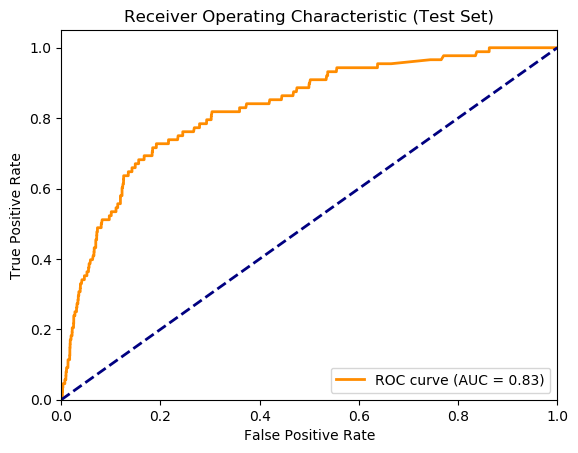

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_proba_test = clf.predict_proba(X_test_pca_df)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr_test, tpr_test, color='darkorange', lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Test Set)')
plt.legend(loc="lower right")
plt.show()

In [46]:
from sklearn.metrics import precision_recall_curve, auc


In [47]:
y_proba = clf.predict_proba(X_test_pca_df)[:, 1]


In [48]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)


In [50]:
auc_pr = auc(recall, precision)
auc_pr

0.006922977106652145